In [1]:
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shrna = pd.read_excel("/Users/davidchen/Documents/GitHub/Sandor_David/MiniScreen04_Samples_Fractions_and_RawCounts.xlsx", sheet_name="Raw shRNA", index_col=0).iloc[:, 1:]

In [3]:
grna = pd.read_excel("/Users/davidchen/Documents/GitHub/Sandor_David/MiniScreen04_Samples_Fractions_and_RawCounts.xlsx", sheet_name="Raw gRNA", index_col=0).iloc[:, 3:]

# MaGeCK MLE Design Matrix File

In [5]:
#Columns: Fractions
#Rows: Fractions
def design_matrix(primer, day):
    design_matrix = pd.DataFrame(columns = ["Samples", "baseline"])

    if day == 3:
        fraction = range(1,5)
    elif day == 7:
        fraction = range(5,9)
    else:
        print("Wrong day!")
        
    design_matrix['Samples'] = ["P" + str(primer) + "_F" + str(frac) + ".fq" for frac in fraction]       
    
    counter = 1
    for column in ["P" + str(primer) + "_F" + str(frac) + ".fq" for frac in fraction[1:]]:
        values = [0,0,0,0]
        values[counter] = 1
        design_matrix[column] = values
        counter += 1
    design_matrix['baseline'] = 1
    return design_matrix

In [6]:
def matrix_save(primer, day):
    design_matrix(primer=primer, day=day).to_csv('/Users/davidchen/Documents/GitHub/Sandor_David/design_mat_P' + str(primer) + '_' + "D" + str(day) + '.txt', index=None, sep='\t', mode='w+')

## Primer 3: LS180 SOX9 GFP 

In [7]:
matrix_save(primer=3, day=3)
design_matrix(primer=3, day=3)

Samples  baseline  P3_F2.fq  P3_F3.fq  P3_F4.fq
0  P3_F1.fq         1         0         0         0
1  P3_F2.fq         1         1         0         0
2  P3_F3.fq         1         0         1         0
3  P3_F4.fq         1         0         0         1

In [8]:
matrix_save(primer=3, day=7)
design_matrix(primer=3, day=7)

Samples  baseline  P3_F6.fq  P3_F7.fq  P3_F8.fq
0  P3_F5.fq         1         0         0         0
1  P3_F6.fq         1         1         0         0
2  P3_F7.fq         1         0         1         0
3  P3_F8.fq         1         0         0         1

## Primer 4: HT-29 KRT20 GFP 

In [12]:
matrix_save(primer=4, day=3)
design_matrix(primer=4, day=3)

Samples  baseline  P4_F2.fq  P4_F3.fq  P4_F4.fq
0  P4_F1.fq         1         0         0         0
1  P4_F2.fq         1         1         0         0
2  P4_F3.fq         1         0         1         0
3  P4_F4.fq         1         0         0         1

In [13]:
matrix_save(primer=4, day=7)
design_matrix(primer=4, day=7)

Samples  baseline  P4_F6.fq  P4_F7.fq  P4_F8.fq
0  P4_F5.fq         1         0         0         0
1  P4_F6.fq         1         1         0         0
2  P4_F7.fq         1         0         1         0
3  P4_F8.fq         1         0         0         1

# Primer 3 - Day 3

mageck mle -k P3.txt -d design_mat_P3_D3.txt -n P3_D3

In [13]:
pd.read_csv('MLE/P3_D3.gene_summary.txt',sep='\t')

Gene  sgRNA  P3_F2.fq|beta  P3_F2.fq|z  P3_F2.fq|p-value  P3_F2.fq|fdr  \
0    SOX9      6       0.144330     1.21220               0.0       0.00000   
1   PROM1      6      -0.006865    -0.25880               0.5       0.71429   
2   KRT20      6      -0.042809    -1.42290               0.0       0.00000   
3   LRIG1      6       0.005513     0.21919               0.7       0.77778   
4    CTRL     10       0.028175     1.15470               0.7       0.77778   
5  ROSA26     10      -0.027537    -1.04930               0.0       0.00000   
6    CCR5     10      -0.008604    -0.37119               0.5       0.71429   
7   AAVS1     10      -0.002242    -0.12659               0.8       0.80000   
8    EGFP      6       0.084727     0.39065               0.1       0.20000   
9  mKate2      6       0.084138     2.23970               0.1       0.20000   

   P3_F2.fq|wald-p-value  P3_F2.fq|wald-fdr  P3_F3.fq|beta  P3_F3.fq|z  \
0               0.225450            0.58813       0.324790     2.72760   
1               0.795790            0.89927      -0.017381    -0.65524   
2               0.154760            0.58813      -0.025034    -0.83210   
3               0.826500            0.89927       0.007608     0.30248   
4               0.248190            0.58813      -0.038033    -1.55880   
5               0.294060            0.58813      -0.037782    -1.43960   
6               0.710490            0.89927      -0.012304    -0.53084   
7               0.899270            0.89927       0.002697     0.15226   
8               0.696050            0.89927       0.501840     2.31380   
9               0.025109            0.25109       0.040744     1.08460   

   P3_F3.fq|p-value  P3_F3.fq|fdr  P3_F3.fq|wald-p-value  P3_F3.fq|wald-fdr  \
0               0.0       0.00000               0.006379           0.063788   
1               0.1       0.16667               0.512310           0.731870   
2               0.1       0.16667               0.405350           0.675590   
3               0.5       0.62500               0.762290           0.846990   
4               0.0       0.00000               0.119050           0.374920   
5               0.0       0.00000               0.149970           0.374920   
6               0.4       0.57143               0.595530           0.744410   
7               0.6       0.66667               0.878980           0.878980   
8               0.0       0.00000               0.020677           0.103380   
9               0.9       0.90000               0.278100           0.556200   

   P3_F4.fq|beta  P3_F4.fq|z  P3_F4.fq|p-value  P3_F4.fq|fdr  \
0       0.178060     1.49540               0.0       0.00000   
1       0.015013     0.56594               0.8       0.80000   
2      -0.048672    -1.61780               0.1       0.20000   
3       0.004517     0.17961               0.6       0.75000   
4      -0.048836    -2.00150               0.0       0.00000   
5      -0.040539    -1.54470               0.0       0.00000   
6      -0.035150    -1.51650               0.2       0.33333   
7       0.003901     0.22027               0.8       0.80000   
8       0.344350     1.58770               0.0       0.00000   
9       0.068253     1.81690               0.4       0.57143   

   P3_F4.fq|wald-p-value  P3_F4.fq|wald-fdr  
0               0.134820            0.19260  
1               0.571440            0.71430  
2               0.105700            0.19260  
3               0.857460            0.85746  
4               0.045334            0.19260  
5               0.122420            0.19260  
6               0.129400            0.19260  
7               0.825660            0.85746  
8               0.112350            0.19260  
9               0.069237            0.19260

# Primer 3 - Day 7

mageck mle -k P3.txt -d design_mat_P3_D7.txt -n P3_D7

In [14]:
pd.read_csv('MLE/P3_D7.gene_summary.txt',sep='\t')

Gene  sgRNA  P3_F6.fq|beta  P3_F6.fq|z  P3_F6.fq|p-value  P3_F6.fq|fdr  \
0    SOX9      6       0.036487    0.089351               0.5       0.71429   
1   PROM1      6      -0.117460   -1.347900               0.3       0.60000   
2   KRT20      6      -0.064831   -0.712050               0.4       0.66667   
3   LRIG1      6      -0.098053   -1.161600               0.3       0.60000   
4    CTRL     10      -0.038094   -0.818790               0.8       1.00000   
5  ROSA26     10       0.014895    0.316270               1.0       1.00000   
6    CCR5     10      -0.026849   -0.510940               0.9       1.00000   
7   AAVS1     10       0.070263    1.015000               0.3       0.60000   
8    EGFP      6       1.063900    0.726210               0.0       0.00000   
9  mKate2      6      -0.131030   -1.664800               0.2       0.60000   

   P3_F6.fq|wald-p-value  P3_F6.fq|wald-fdr  P3_F7.fq|beta  P3_F7.fq|z  \
0               0.928800            0.92880       0.749180    1.834700   
1               0.177690            0.68062      -0.051414   -0.589980   
2               0.476430            0.68062      -0.177810   -1.952900   
3               0.245410            0.68062      -0.204020   -2.416900   
4               0.412900            0.68062      -0.025515   -0.548430   
5               0.751800            0.83533      -0.025841   -0.548670   
6               0.609390            0.76174      -0.087176   -1.658900   
7               0.310100            0.68062       0.005641    0.081495   
8               0.467710            0.68062       1.312500    0.895870   
9               0.095948            0.68062      -0.039844   -0.506240   

   P3_F7.fq|p-value  P3_F7.fq|fdr  P3_F7.fq|wald-p-value  P3_F7.fq|wald-fdr  \
0               0.0       0.00000               0.066543            0.22181   
1               0.5       0.66667               0.555210            0.68077   
2               0.0       0.00000               0.050828            0.22181   
3               0.0       0.00000               0.015653            0.15653   
4               0.6       0.66667               0.583400            0.68077   
5               0.6       0.66667               0.583230            0.68077   
6               0.3       0.60000               0.097127            0.24282   
7               0.7       0.70000               0.935050            0.93505   
8               0.0       0.00000               0.370320            0.68077   
9               0.6       0.66667               0.612690            0.68077   

   P3_F8.fq|beta  P3_F8.fq|z  P3_F8.fq|p-value  P3_F8.fq|fdr  \
0       0.789370     1.93290               0.0       0.00000   
1      -0.062763    -0.72019               0.5       0.62500   
2      -0.103970    -1.14180               0.3       0.60000   
3      -0.196160    -2.32350               0.0       0.00000   
4      -0.019633    -0.42196               0.6       0.66667   
5      -0.029562    -0.62758               0.5       0.62500   
6      -0.074628    -1.42000               0.3       0.60000   
7       0.074699     1.07880               0.9       0.90000   
8       1.338400     0.91345               0.0       0.00000   
9      -0.075904    -0.96439               0.4       0.62500   

   P3_F8.fq|wald-p-value  P3_F8.fq|wald-fdr  
0               0.053243            0.26622  
1               0.471410            0.58920  
2               0.253550            0.51572  
3               0.020151            0.20151  
4               0.673060            0.67306  
5               0.530280            0.58920  
6               0.155590            0.51572  
7               0.280700            0.51572  
8               0.361010            0.51572  
9               0.334850            0.51572

# Primer 4 - Day 3

mageck mle -k P4.txt -d design_mat_P4_D3.txt -n P4_D3

In [10]:
pd.read_csv('MLE/P4_D3.gene_summary.txt',sep='\t')

Gene  sgRNA  P4_F2.fq|beta  P4_F2.fq|z  P4_F2.fq|p-value  P4_F2.fq|fdr  \
0    SOX9      6      -0.310260   -1.121100               0.0          0.00   
1   PROM1      6      -0.001608   -0.038161               0.3          0.50   
2   KRT20      6      -0.070658   -0.041946               0.7          0.70   
3   LRIG1      6       0.034251    0.949900               0.0          0.00   
4    CTRL     10      -0.016932   -0.606820               0.7          0.70   
5  ROSA26     10      -0.022652   -0.768650               0.7          0.70   
6    CCR5     10      -0.054292   -1.460700               0.7          0.70   
7   AAVS1     10       0.019036    0.585560               0.1          0.25   
8    EGFP      6       0.069515    0.018679               0.0          0.00   
9  mKate2      6       0.017073    0.603070               0.2          0.40   

   P4_F2.fq|wald-p-value  P4_F2.fq|wald-fdr  P4_F3.fq|beta  P4_F3.fq|z  \
0                0.26223            0.79739      -1.322500    -4.77810   
1                0.96956            0.98510       0.022603     0.53656   
2                0.96654            0.98510       1.777300     1.05520   
3                0.34217            0.79739       0.022459     0.62287   
4                0.54397            0.79739       0.015805     0.56643   
5                0.44210            0.79739      -0.034915    -1.18470   
6                0.14411            0.79739      -0.019558    -0.52617   
7                0.55817            0.79739      -0.064286    -1.97730   
8                0.98510            0.98510       2.457200     0.66040   
9                0.54646            0.79739       0.011051     0.39037   

   P4_F3.fq|p-value  P4_F3.fq|fdr  P4_F3.fq|wald-p-value  P4_F3.fq|wald-fdr  \
0               0.0       0.00000               0.000002           0.000018   
1               1.0       1.00000               0.591570           0.665300   
2               0.0       0.00000               0.291310           0.665300   
3               1.0       1.00000               0.533370           0.665300   
4               0.4       0.57143               0.571100           0.665300   
5               0.3       0.50000               0.236130           0.665300   
6               0.3       0.50000               0.598770           0.665300   
7               0.3       0.50000               0.048006           0.240030   
8               0.0       0.00000               0.509000           0.665300   
9               1.0       1.00000               0.696270           0.696270   

   P4_F4.fq|beta  P4_F4.fq|z  P4_F4.fq|p-value  P4_F4.fq|fdr  \
0      -1.343500    -4.85270               0.0       0.00000   
1       0.029729     0.70572               1.0       1.00000   
2       1.766100     1.04850               0.0       0.00000   
3       0.016781     0.46537               1.0       1.00000   
4       0.013168     0.47189               0.6       0.85714   
5      -0.023562    -0.79946               0.3       0.50000   
6      -0.064138    -1.72550               0.3       0.50000   
7      -0.061400    -1.88840               0.3       0.50000   
8       2.415600     0.64919               0.0       0.00000   
9       0.030248     1.06850               1.0       1.00000   

   P4_F4.fq|wald-p-value  P4_F4.fq|wald-fdr  
0               0.000001           0.000012  
1               0.480360           0.641660  
2               0.294400           0.588810  
3               0.641660           0.641660  
4               0.637010           0.641660  
5               0.424020           0.641660  
6               0.084441           0.281470  
7               0.058971           0.281470  
8               0.516210           0.641660  
9               0.285310           0.588810

# Primer 4 - Day 7

mageck mle -k P4.txt -d design_mat_P4_D7.txt -n P4_D7

In [11]:
pd.read_csv('MLE/P4_D7.gene_summary.txt',sep='\t')

Gene  sgRNA  P4_F6.fq|beta  P4_F6.fq|z  P4_F6.fq|p-value  P4_F6.fq|fdr  \
0    SOX9      6      -0.113730   -1.284800               0.0           0.0   
1   PROM1      6      -0.002523   -0.085791               0.9           0.9   
2   KRT20      6       0.147970    0.611510               0.0           0.0   
3   LRIG1      6      -0.045058   -1.482200               0.0           0.0   
4    CTRL     10       0.013660    0.947090               0.9           0.9   
5  ROSA26     10       0.012100    0.510240               0.9           0.9   
6    CCR5     10      -0.011391   -0.626680               0.4           0.8   
7   AAVS1     10       0.011775    0.624860               0.8           0.9   
8    EGFP      6       0.140700    0.590700               0.0           0.0   
9  mKate2      6       0.008047    0.372540               0.8           0.9   

   P4_F6.fq|wald-p-value  P4_F6.fq|wald-fdr  P4_F7.fq|beta  P4_F7.fq|z  \
0                0.19885            0.76235      -0.291090    -3.28830   
1                0.93163            0.93163      -0.014972    -0.50916   
2                0.54086            0.76235       0.517960     2.14060   
3                0.13828            0.76235      -0.052734    -1.73470   
4                0.34359            0.76235      -0.009216    -0.63898   
5                0.60988            0.76235       0.030024     1.26610   
6                0.53087            0.76235       0.017681     0.97274   
7                0.53206            0.76235      -0.020244    -1.07430   
8                0.55472            0.76235       0.470680     1.97610   
9                0.70949            0.78832       0.004942     0.22882   

   P4_F7.fq|p-value  P4_F7.fq|fdr  P4_F7.fq|wald-p-value  P4_F7.fq|wald-fdr  \
0               0.0          0.00               0.001008           0.010079   
1               0.6          0.75               0.610640           0.678490   
2               0.0          0.00               0.032306           0.160490   
3               0.4          0.75               0.082791           0.206980   
4               0.5          0.75               0.522840           0.653550   
5               0.9          0.90               0.205490           0.410990   
6               0.6          0.75               0.330680           0.472400   
7               0.3          0.75               0.282700           0.471170   
8               0.0          0.00               0.048146           0.160490   
9               0.9          0.90               0.819010           0.819010   

   P4_F8.fq|beta  P4_F8.fq|z  P4_F8.fq|p-value  P4_F8.fq|fdr  \
0      -0.229200   -2.589200               0.0       0.00000   
1      -0.001399   -0.047579               0.7       0.77778   
2       0.524990    2.169700               0.0       0.00000   
3      -0.050075   -1.647200               0.3       0.50000   
4      -0.017437   -1.209000               0.3       0.50000   
5       0.041062    1.731500               0.8       0.80000   
6       0.011299    0.621660               0.5       0.62500   
7      -0.037156   -1.971700               0.2       0.50000   
8       0.496590    2.084900               0.0       0.00000   
9      -0.034806   -1.611500               0.4       0.57143   

   P4_F8.fq|wald-p-value  P4_F8.fq|wald-fdr  
0               0.009620           0.096196  
1               0.962050           0.962050  
2               0.030033           0.121600  
3               0.099508           0.152970  
4               0.226660           0.283330  
5               0.083362           0.152970  
6               0.534170           0.593520  
7               0.048639           0.121600  
8               0.037080           0.121600  
9               0.107080           0.152970

# Beta Score

In [16]:
def beta_score(df, day, primer):

    if day == 3:
        fraction = range(2,5)
    elif day == 7:
        fraction = range(6,9)
    else:
        print("Wrong day!")
    
    comparison = ["P" + str(primer) + "_F" + str(frac) + ".fq" for frac in fraction]  

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4),sharey=True)

    ax1.bar(range(10), df[comparison[0] + "|beta"], color = "firebrick")
    ax1.set_xticks(range(10))
    ax1.set_xticklabels(df['Gene'], rotation=90)
    ax1.plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax1.set_xlim(-1,10)
    ax1.set_title("Top 2.5% vs. Top 5%")

    for x in ['SOX9', 'KRT20', 'EGFP']:
        ax1.text(df['Gene'].tolist().index(x)+0.5, list(df[df['Gene'] == x][comparison[0]  + "|beta"])[0], round(list(df[df['Gene'] == x][comparison[0]  + "|beta"])[0],2))

    ax2.bar(range(10), df[comparison[1] + "|beta"], color = "forestgreen")
    ax2.set_xticks(range(10))
    ax2.set_xticklabels(df['Gene'], rotation=90)
    ax2.plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax2.set_xlim(-1,10)
    ax2.set_title("Top 2.5% vs. Bottom 5%")

    for x in ['SOX9', 'KRT20', 'EGFP']:
        ax2.text(df['Gene'].tolist().index(x)+0.5, list(df[df['Gene'] == x][comparison[1]  + "|beta"])[0], round(list(df[df['Gene'] == x][comparison[1]  + "|beta"])[0],2))

    ax3.bar(range(10), df[comparison[2] + "|beta"], color = "royalblue")
    ax3.set_xticks(range(10))
    ax3.set_xticklabels(df['Gene'], rotation=90)
    ax3.plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax3.set_xlim(-1,10)
    ax3.set_title("Top 2.5% vs. Bottom 2.5%")

    for x in ['SOX9', 'KRT20', 'EGFP']:
        ax3.text(df['Gene'].tolist().index(x)+0.5, list(df[df['Gene'] == x][comparison[2]  + "|beta"])[0], round(list(df[df['Gene'] == x][comparison[2]  + "|beta"])[0], 2))


    #fig.tight_layout()
    plt.rcParams.update({'mathtext.default':  'regular' })
    plt.rcParams['font.size'] = 12
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times"
    plt.rcParams["figure.dpi"] = 600
    plt.suptitle("Beta Score", y=1.1,size=20)
    plt.show()


## Primer 3

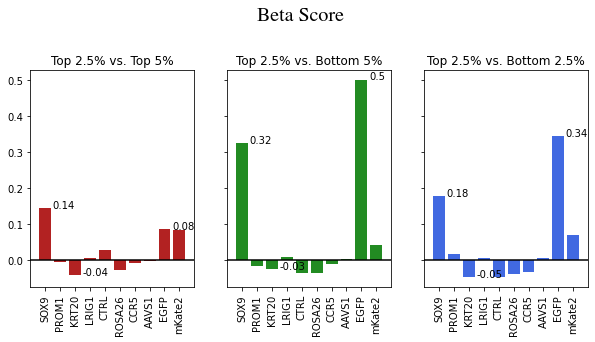

In [17]:
beta_score(df = pd.read_csv('MLE/P3_D3.gene_summary.txt',sep='\t'),
           day = 3,
           primer = 3)

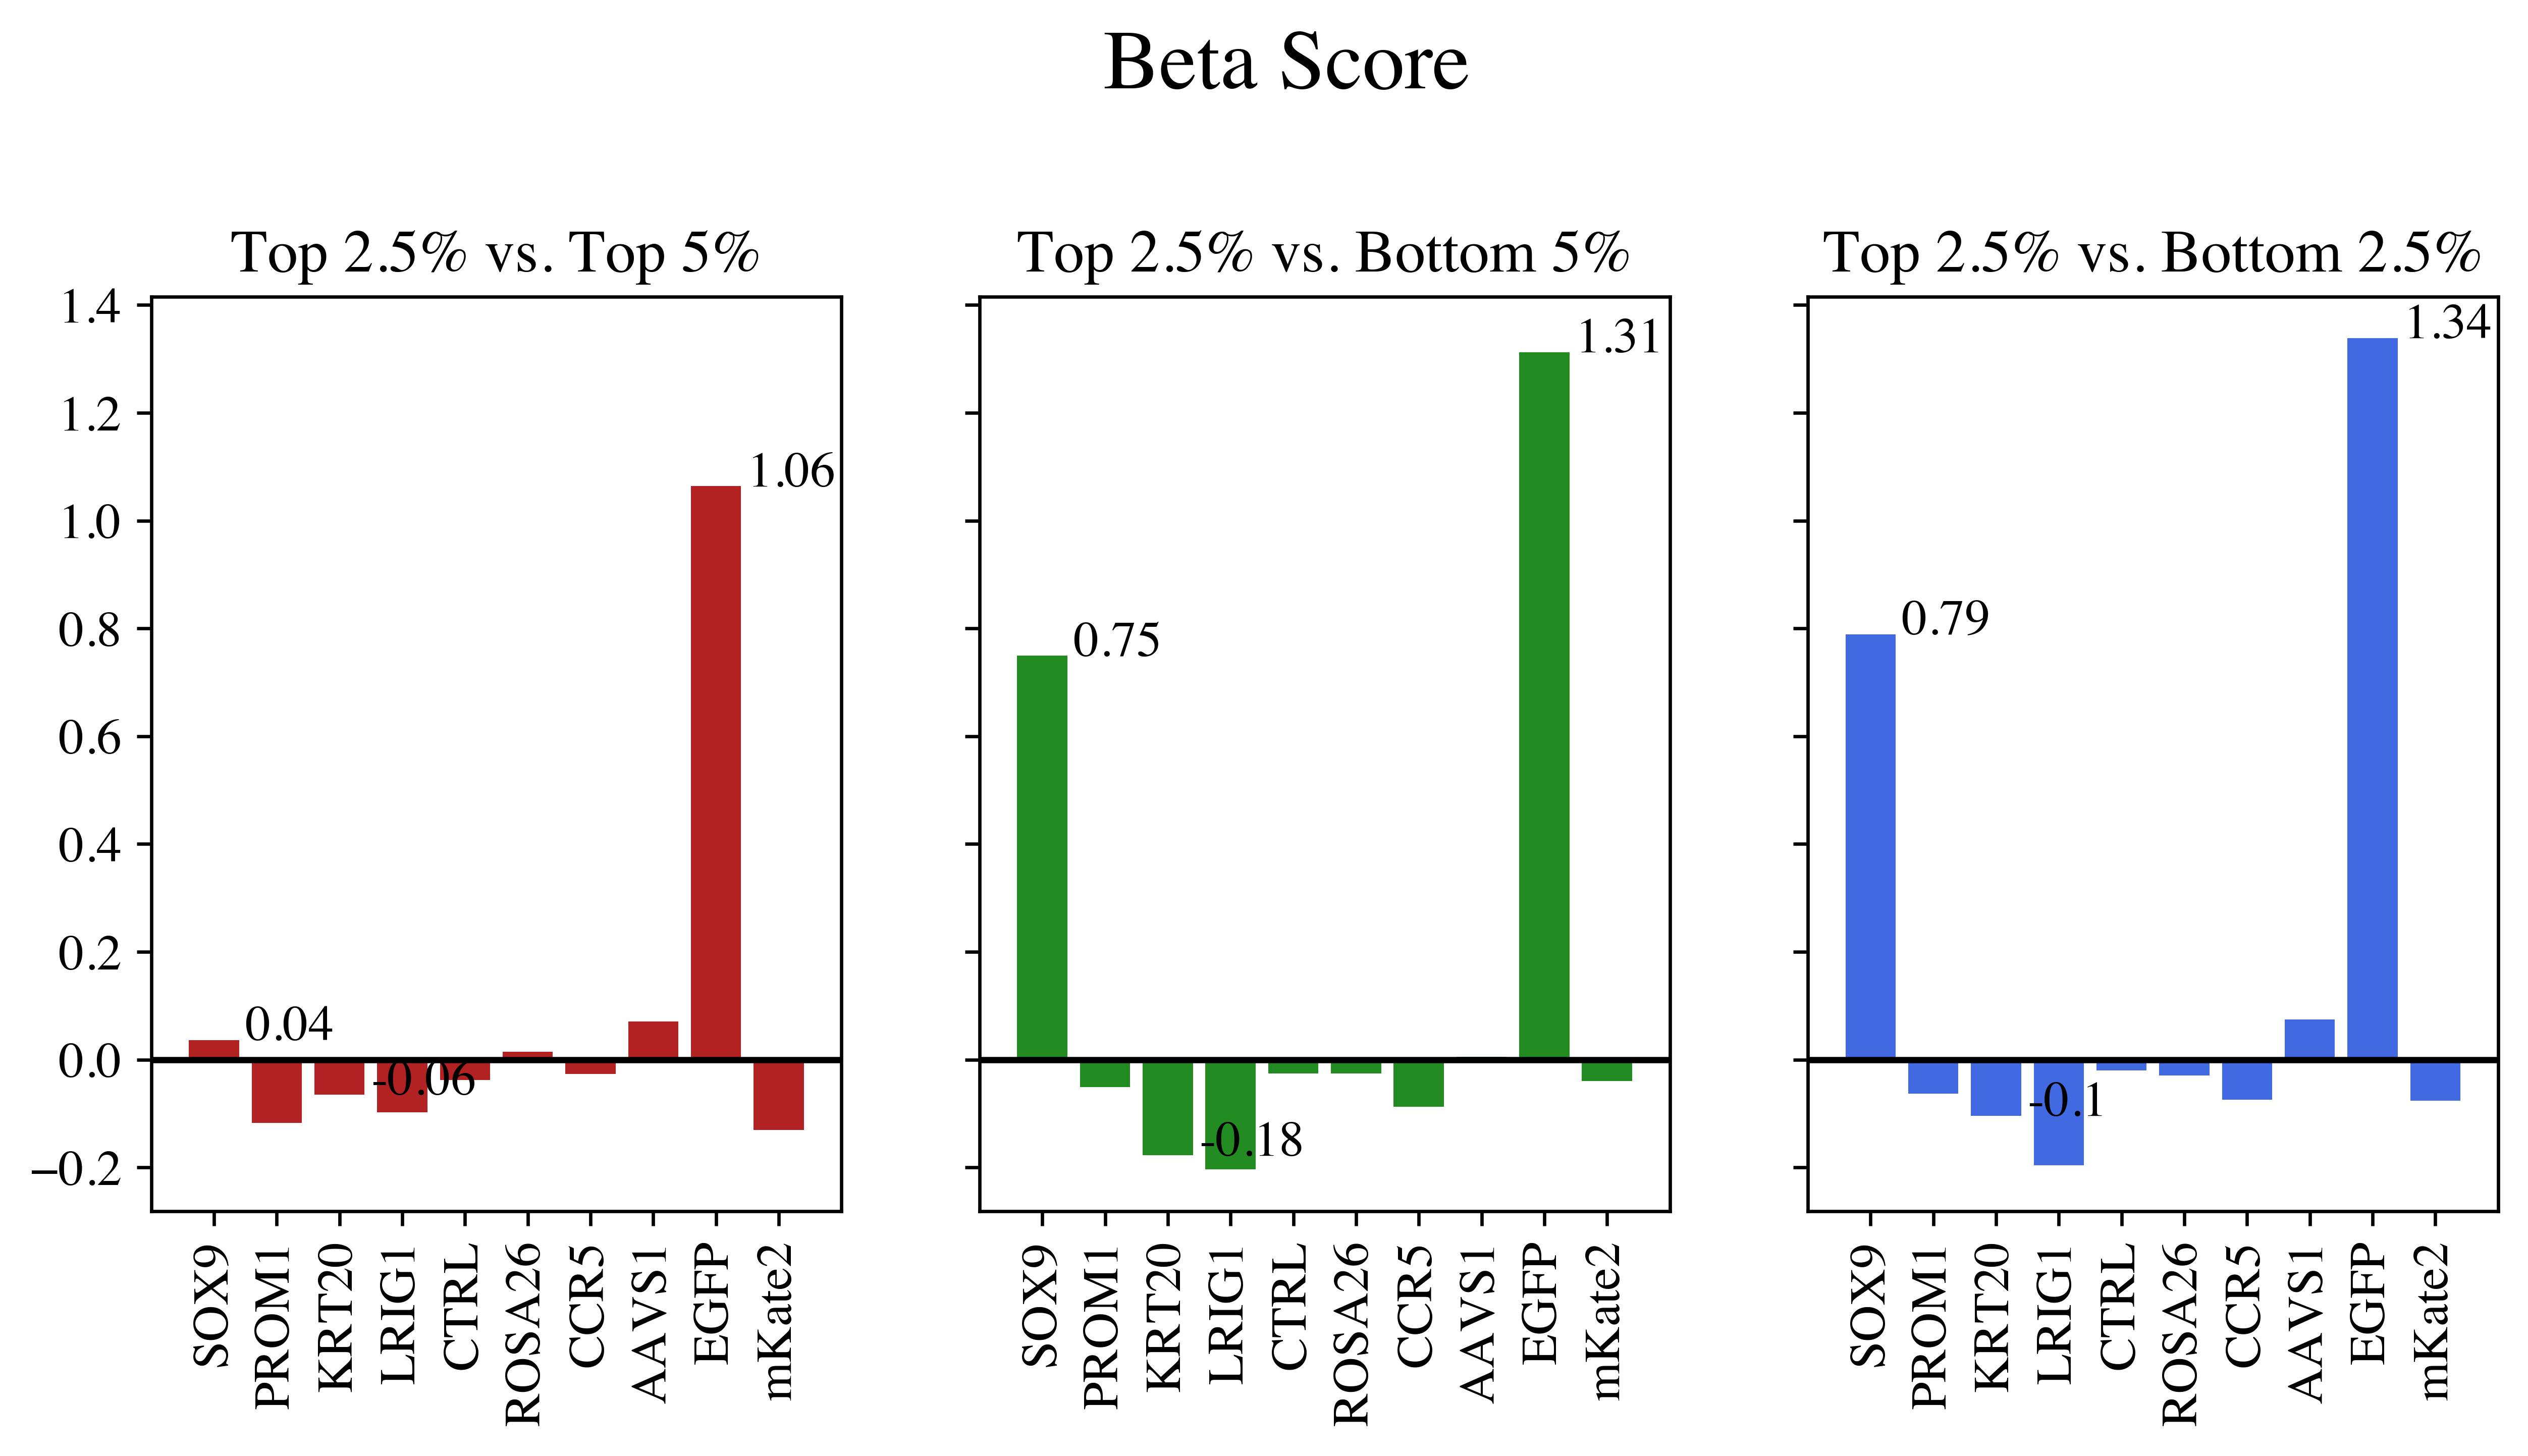

In [18]:
beta_score(df = pd.read_csv('MLE/P3_D7.gene_summary.txt',sep='\t'),
           day = 7,
           primer = 3)

## Primer 4

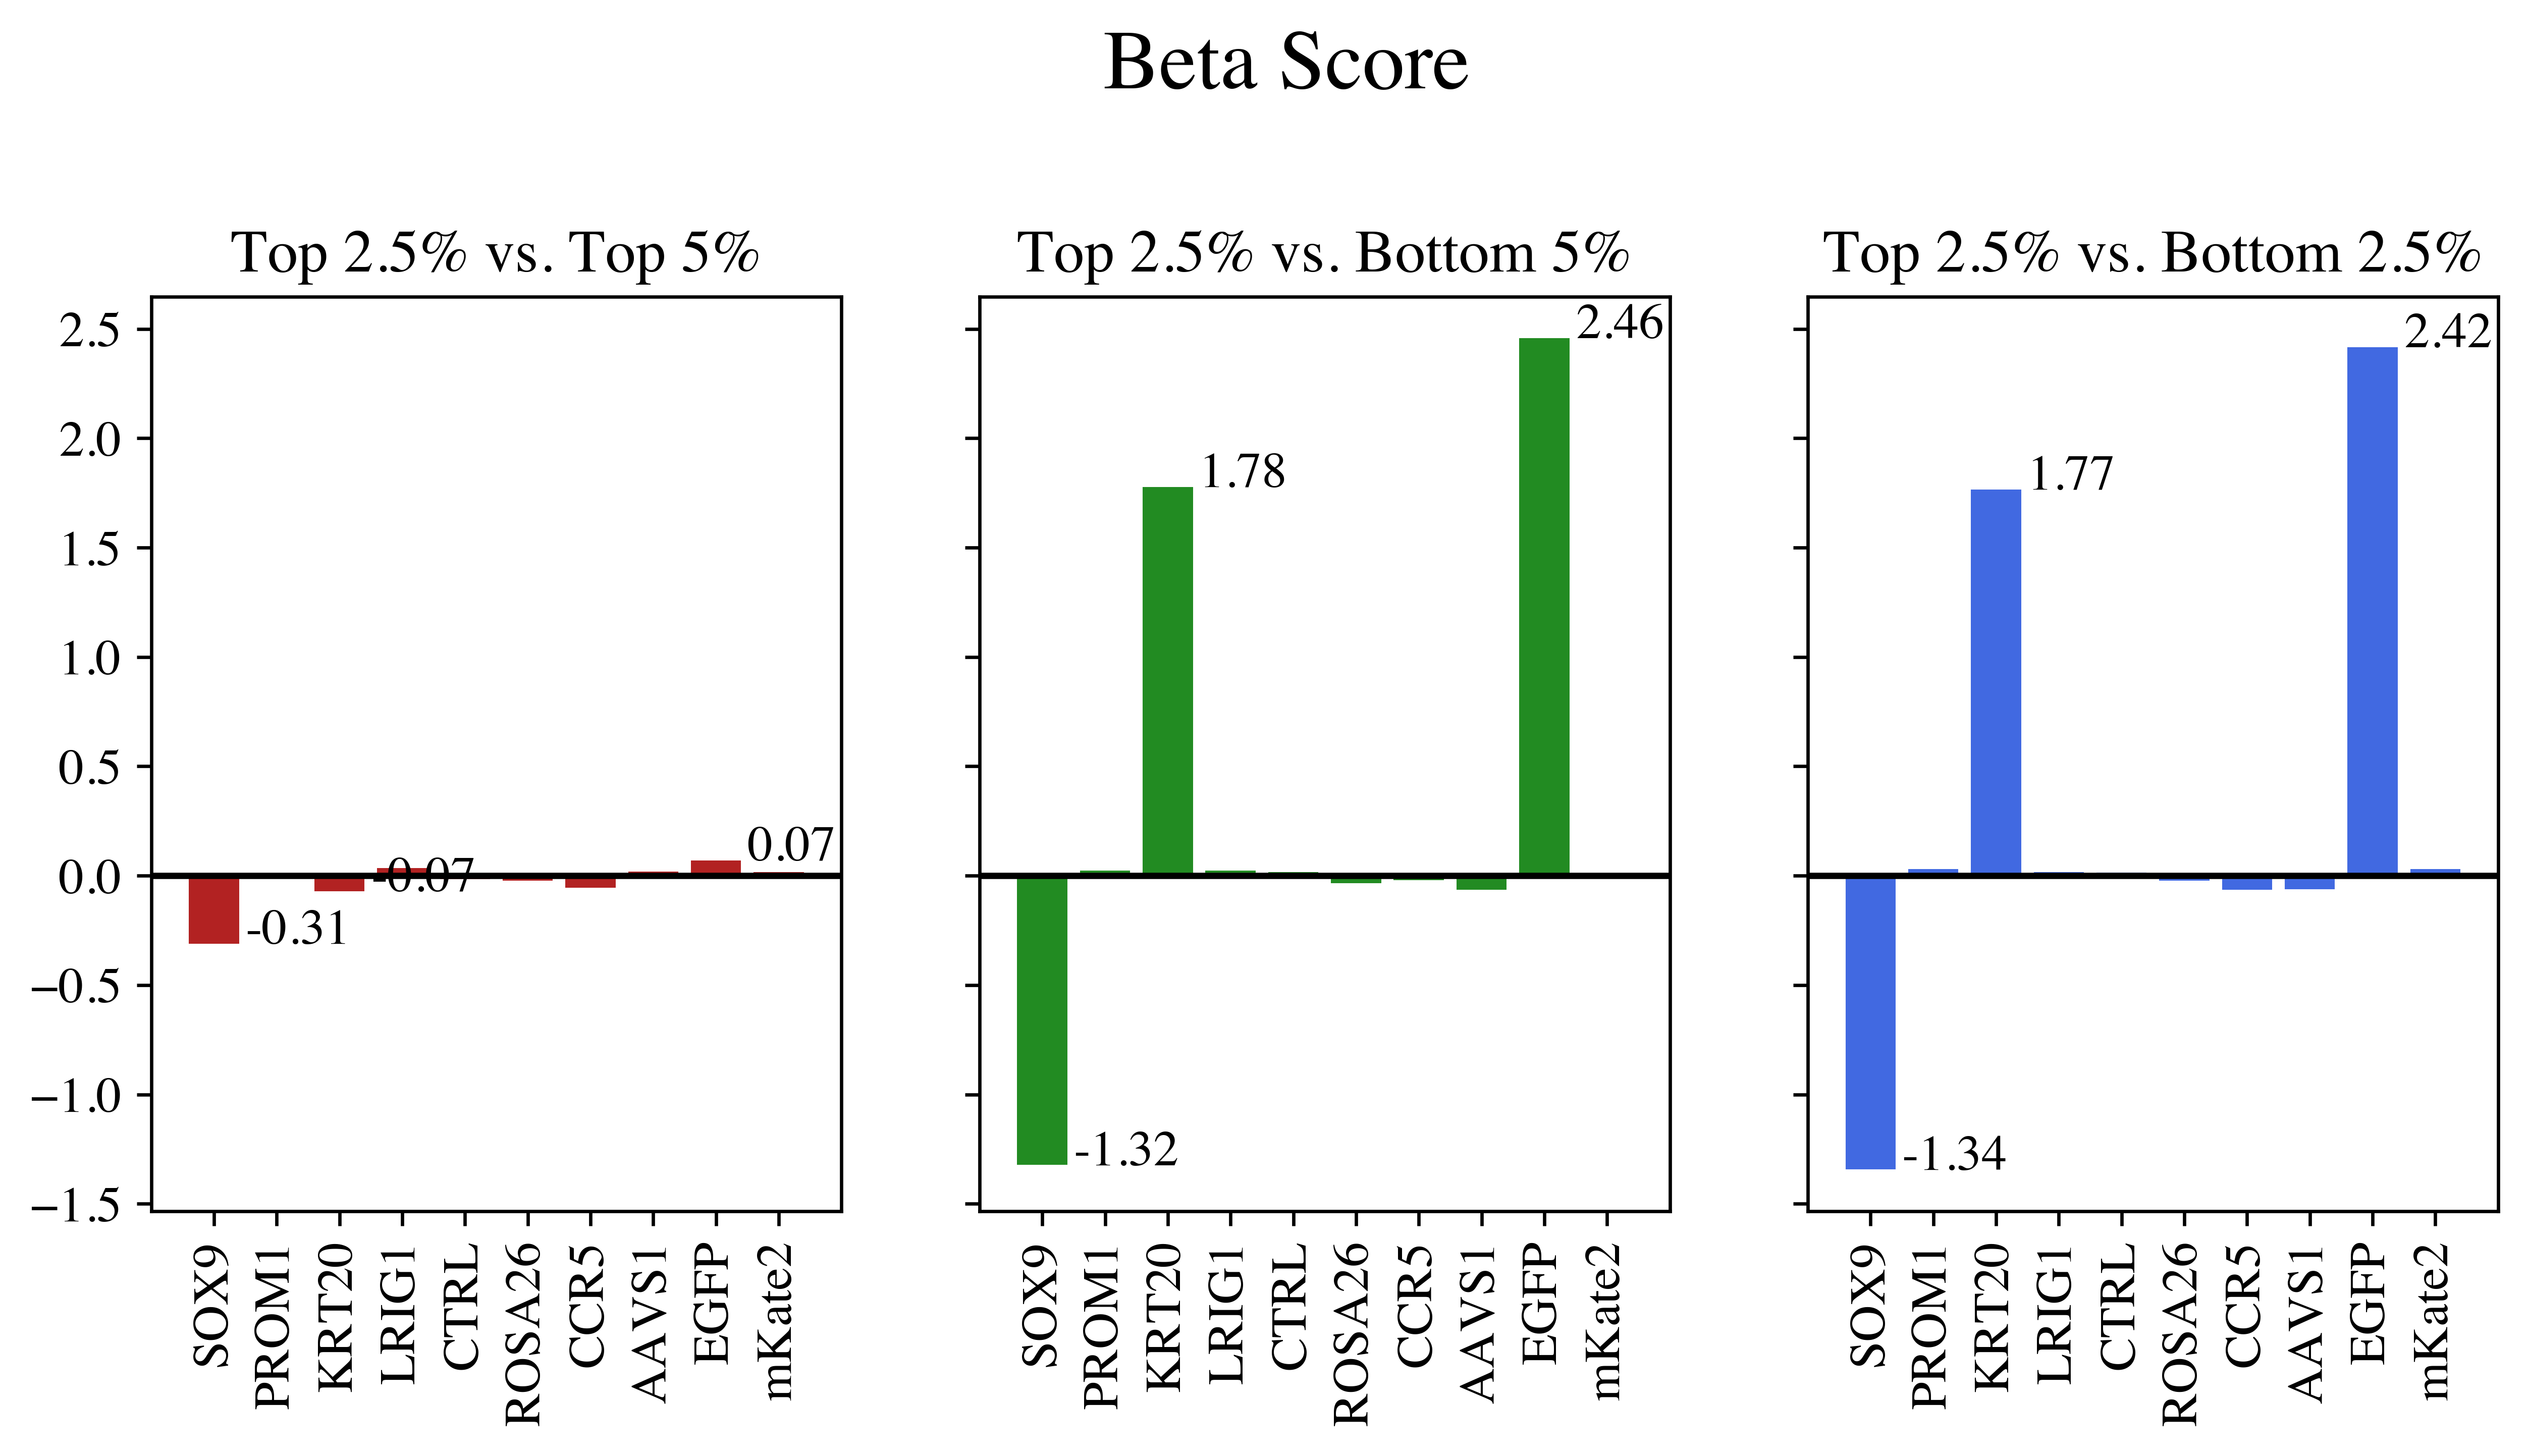

In [117]:
beta_score(df = pd.read_csv('MLE/P4_D3.gene_summary.txt',sep='\t'),
           day = 3,
           primer = 4)

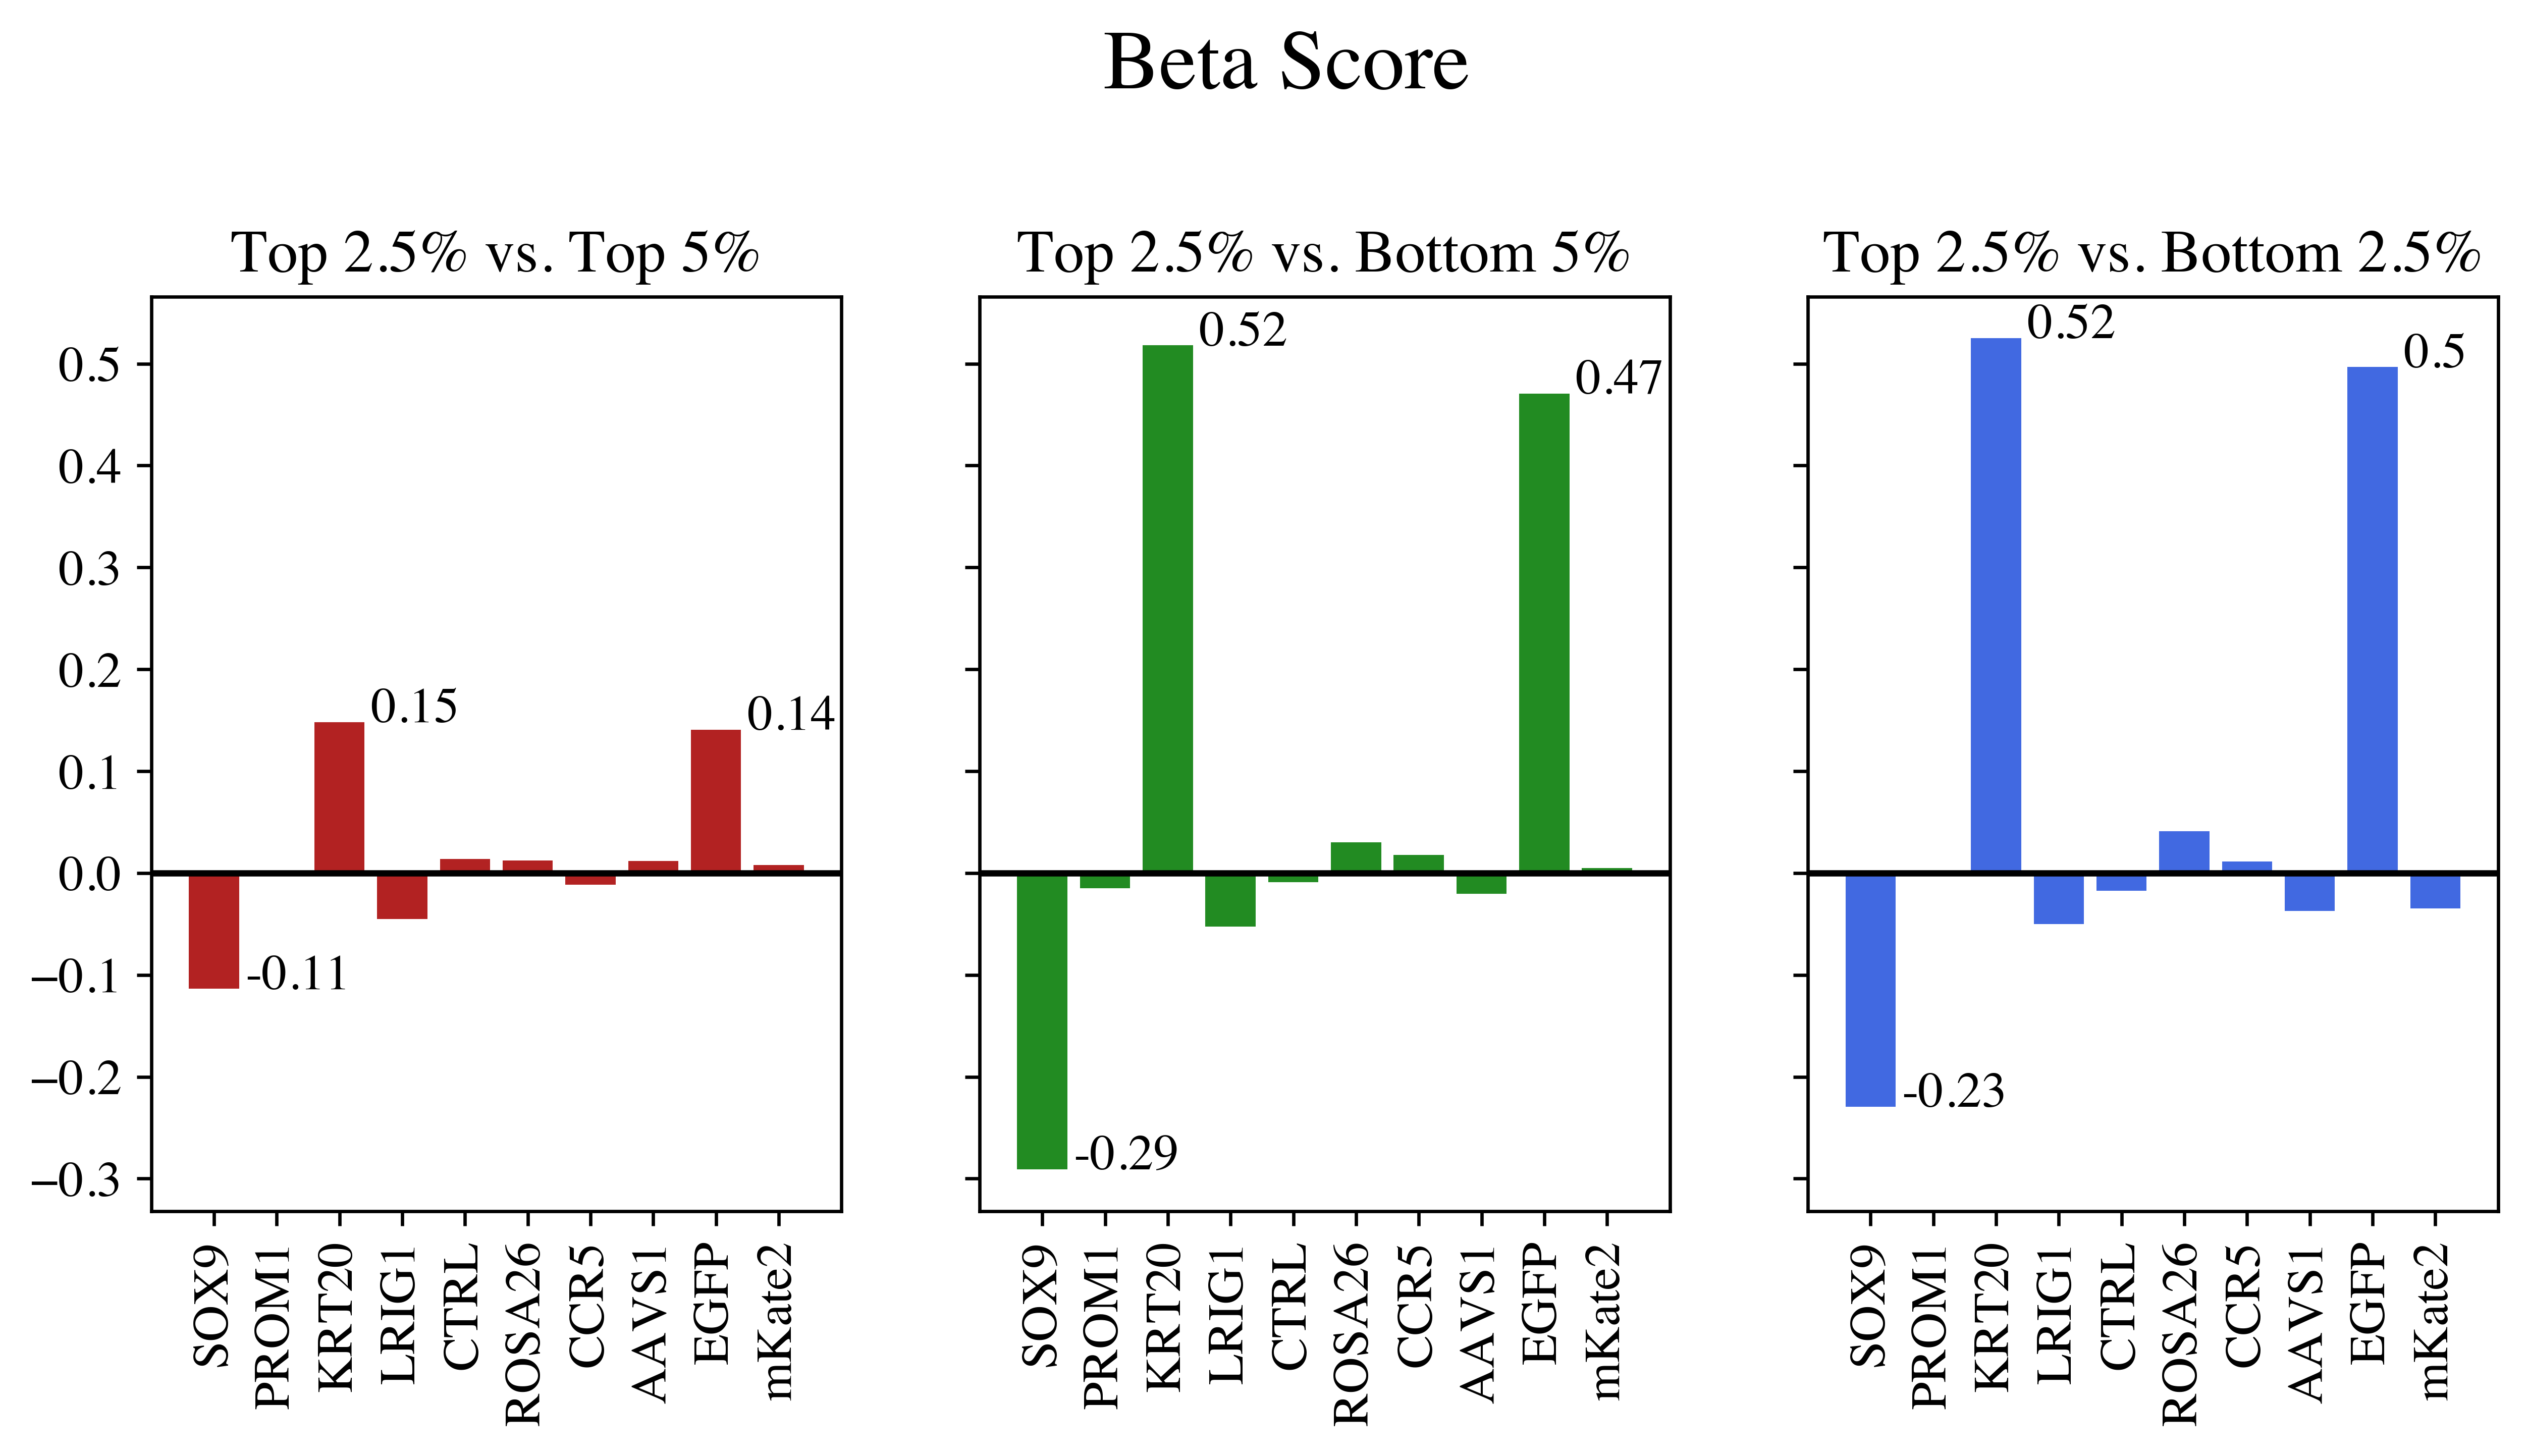

In [118]:
beta_score(df = pd.read_csv('MLE/P4_D7.gene_summary.txt',sep='\t'),
           day = 7,
           primer = 4)

# General Plotting Function

In [107]:
def score(df, day, primer, score, title):

    if day == 3:
        fraction = range(2,5)
    elif day == 7:
        fraction = range(6,9)
    else:
        print("Wrong day!")
    
    comparison = ["P" + str(primer) + "_F" + str(frac) + ".fq" for frac in fraction]  

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4),sharey=True)

    ax1.bar(range(10), df[comparison[0] + "|" + score], color = "firebrick")
    ax1.set_xticks(range(10))
    ax1.set_xticklabels(df['Gene'], rotation=90)
    ax1.plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax1.set_xlim(-1,10)
    ax1.set_title("Top 2.5% vs. Top 5%")

    for x in ['SOX9', 'KRT20', 'EGFP']:
        ax1.text(df['Gene'].tolist().index(x)-0.5, list(df[df['Gene'] == x][comparison[0]  + "|" + score])[0], round(list(df[df['Gene'] == x][comparison[0]  + "|" + score])[0],2))

    ax2.bar(range(10), df[comparison[1] + "|" + score], color = "forestgreen")
    ax2.set_xticks(range(10))
    ax2.set_xticklabels(df['Gene'], rotation=90)
    ax2.plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax2.set_xlim(-1,10)
    ax2.set_title("Top 2.5% vs. Bottom 5%")

    for x in ['SOX9', 'KRT20', 'EGFP']:
        ax2.text(df['Gene'].tolist().index(x)-0.5, list(df[df['Gene'] == x][comparison[1]  + "|" + score])[0], round(list(df[df['Gene'] == x][comparison[1]  + "|" + score])[0],2))

    ax3.bar(range(10), df[comparison[2] + "|" + score], color = "royalblue")
    ax3.set_xticks(range(10))
    ax3.set_xticklabels(df['Gene'], rotation=90)
    ax3.plot(range(-1,11), [0]*12, linestyle='-', color="black")
    ax3.set_xlim(-1,10)
    ax3.set_title("Top 2.5% vs. Bottom 2.5%")

    for x in ['SOX9', 'KRT20', 'EGFP']:
        ax3.text(df['Gene'].tolist().index(x)-0.5, list(df[df['Gene'] == x][comparison[2]  + "|" + score])[0], round(list(df[df['Gene'] == x][comparison[2]  + "|" + score])[0], 2))


    fig.tight_layout()
    plt.rcParams.update({'mathtext.default':  'regular' })
    plt.rcParams['font.size'] = 12
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times"
    plt.rcParams["figure.dpi"] = 600
    plt.suptitle(title, y=1.1,size=20)
    plt.show()


# P Value

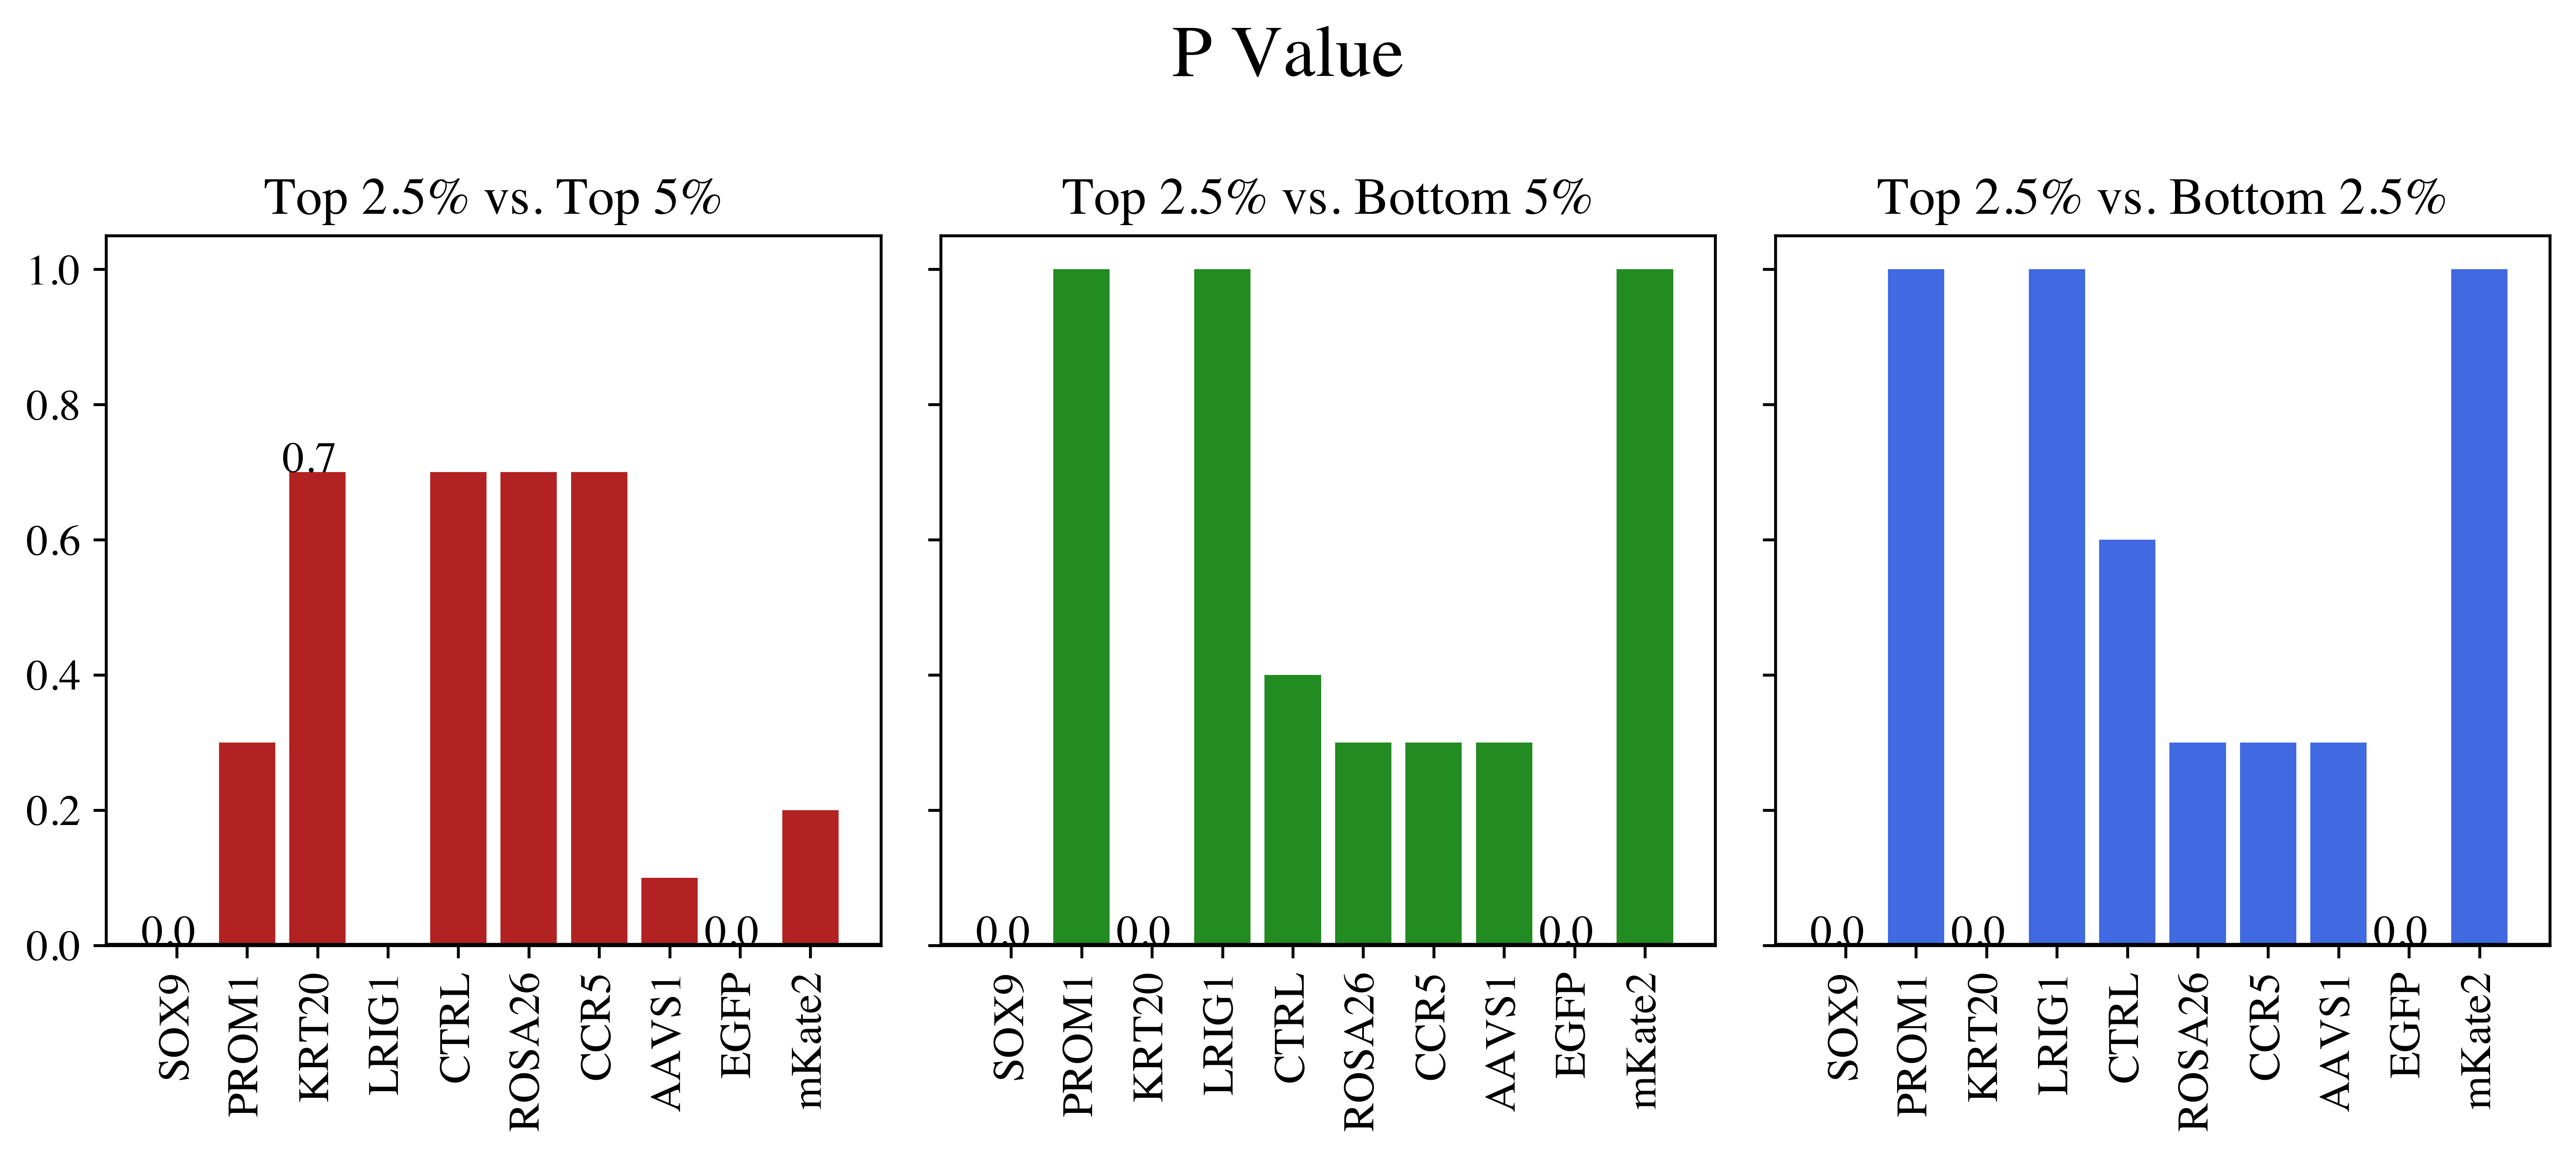

In [108]:
score(df = pd.read_csv('MLE/P4_D3.gene_summary.txt',sep='\t'),
           day = 3,
           primer = 4,
           score = "p-value",
           title = "P Value")

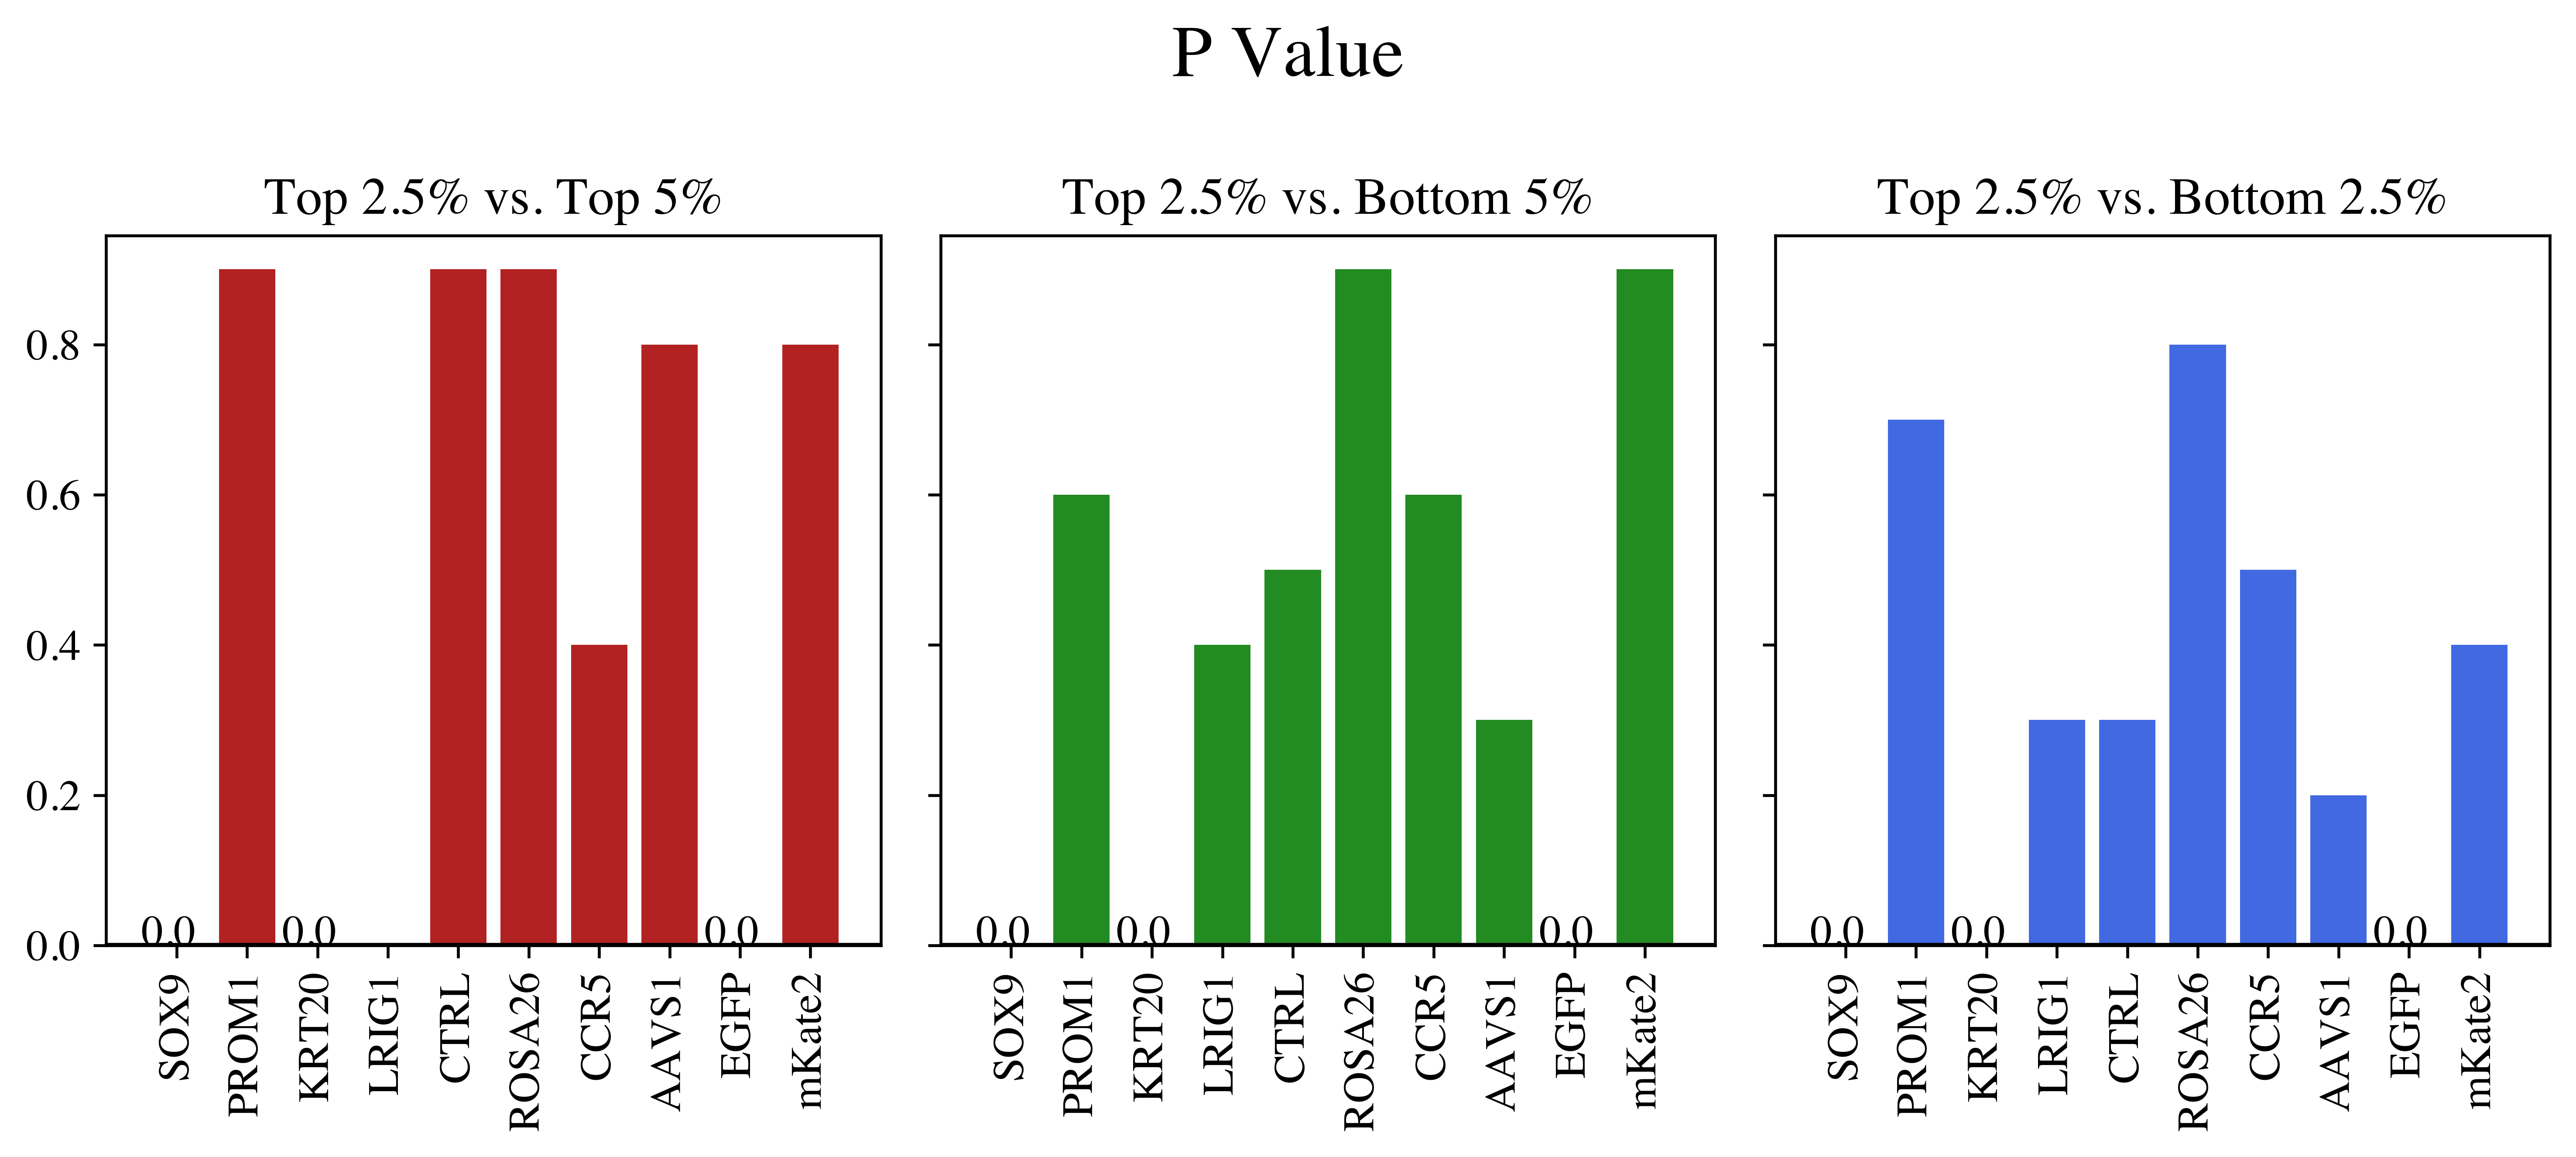

In [109]:
score(df = pd.read_csv('MLE/P4_D7.gene_summary.txt',sep='\t'),
           day = 7,
           primer = 4,
           score = "p-value",
           title = "P Value")

# False Discovery Rate 

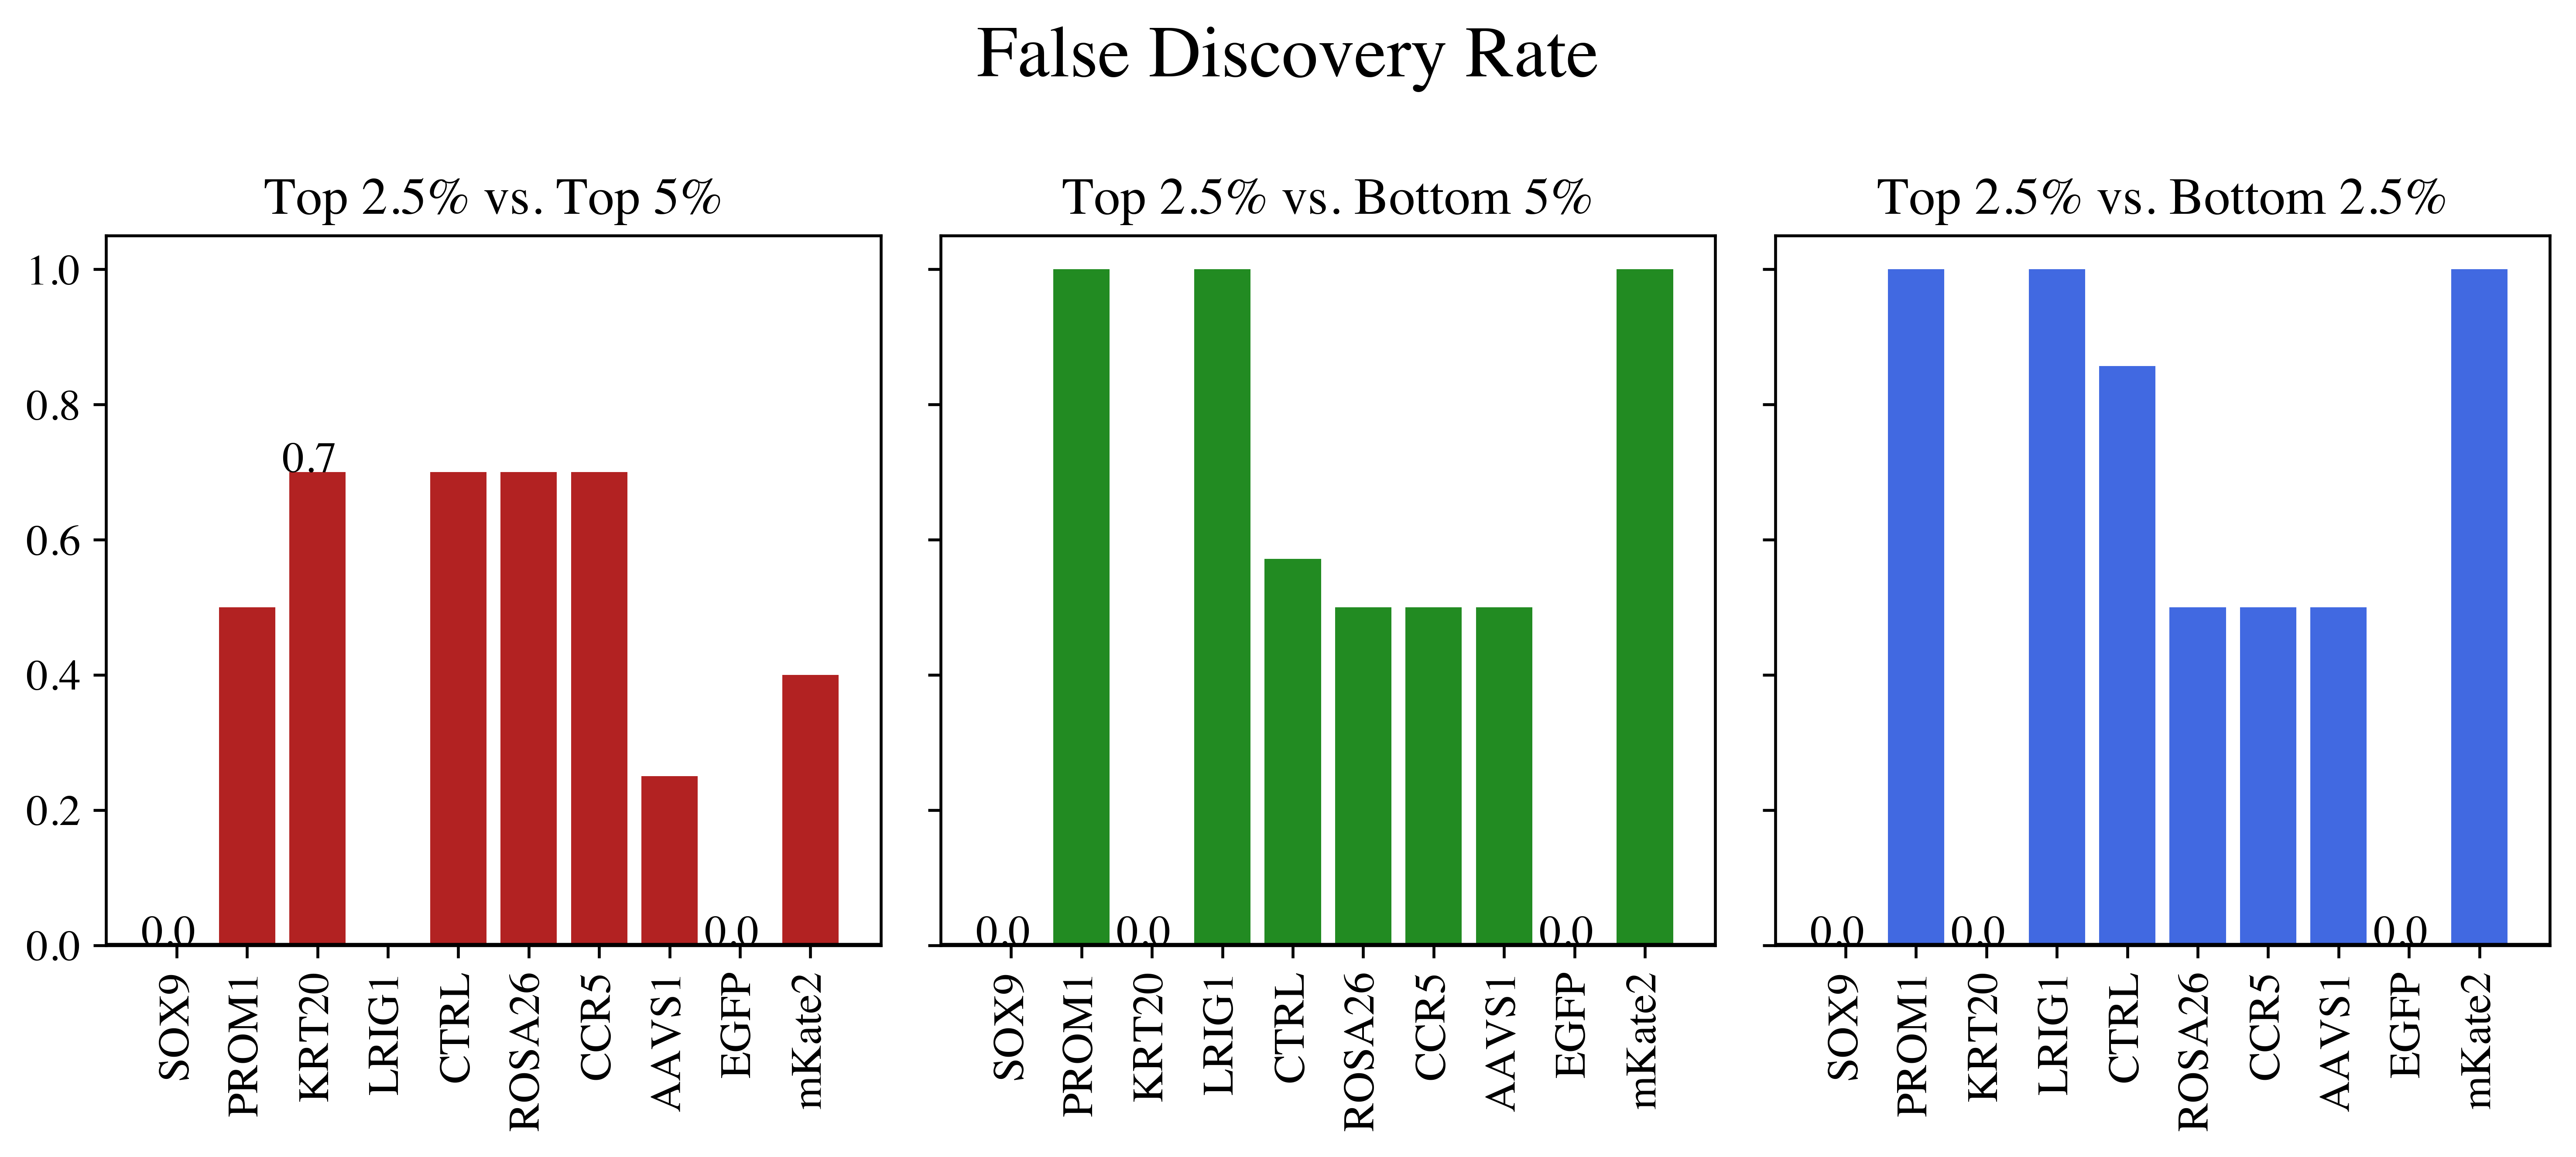

In [110]:
score(df = pd.read_csv('MLE/P4_D3.gene_summary.txt',sep='\t'),
           day = 3,
           primer = 4,
           score = "fdr",
           title = "False Discovery Rate")

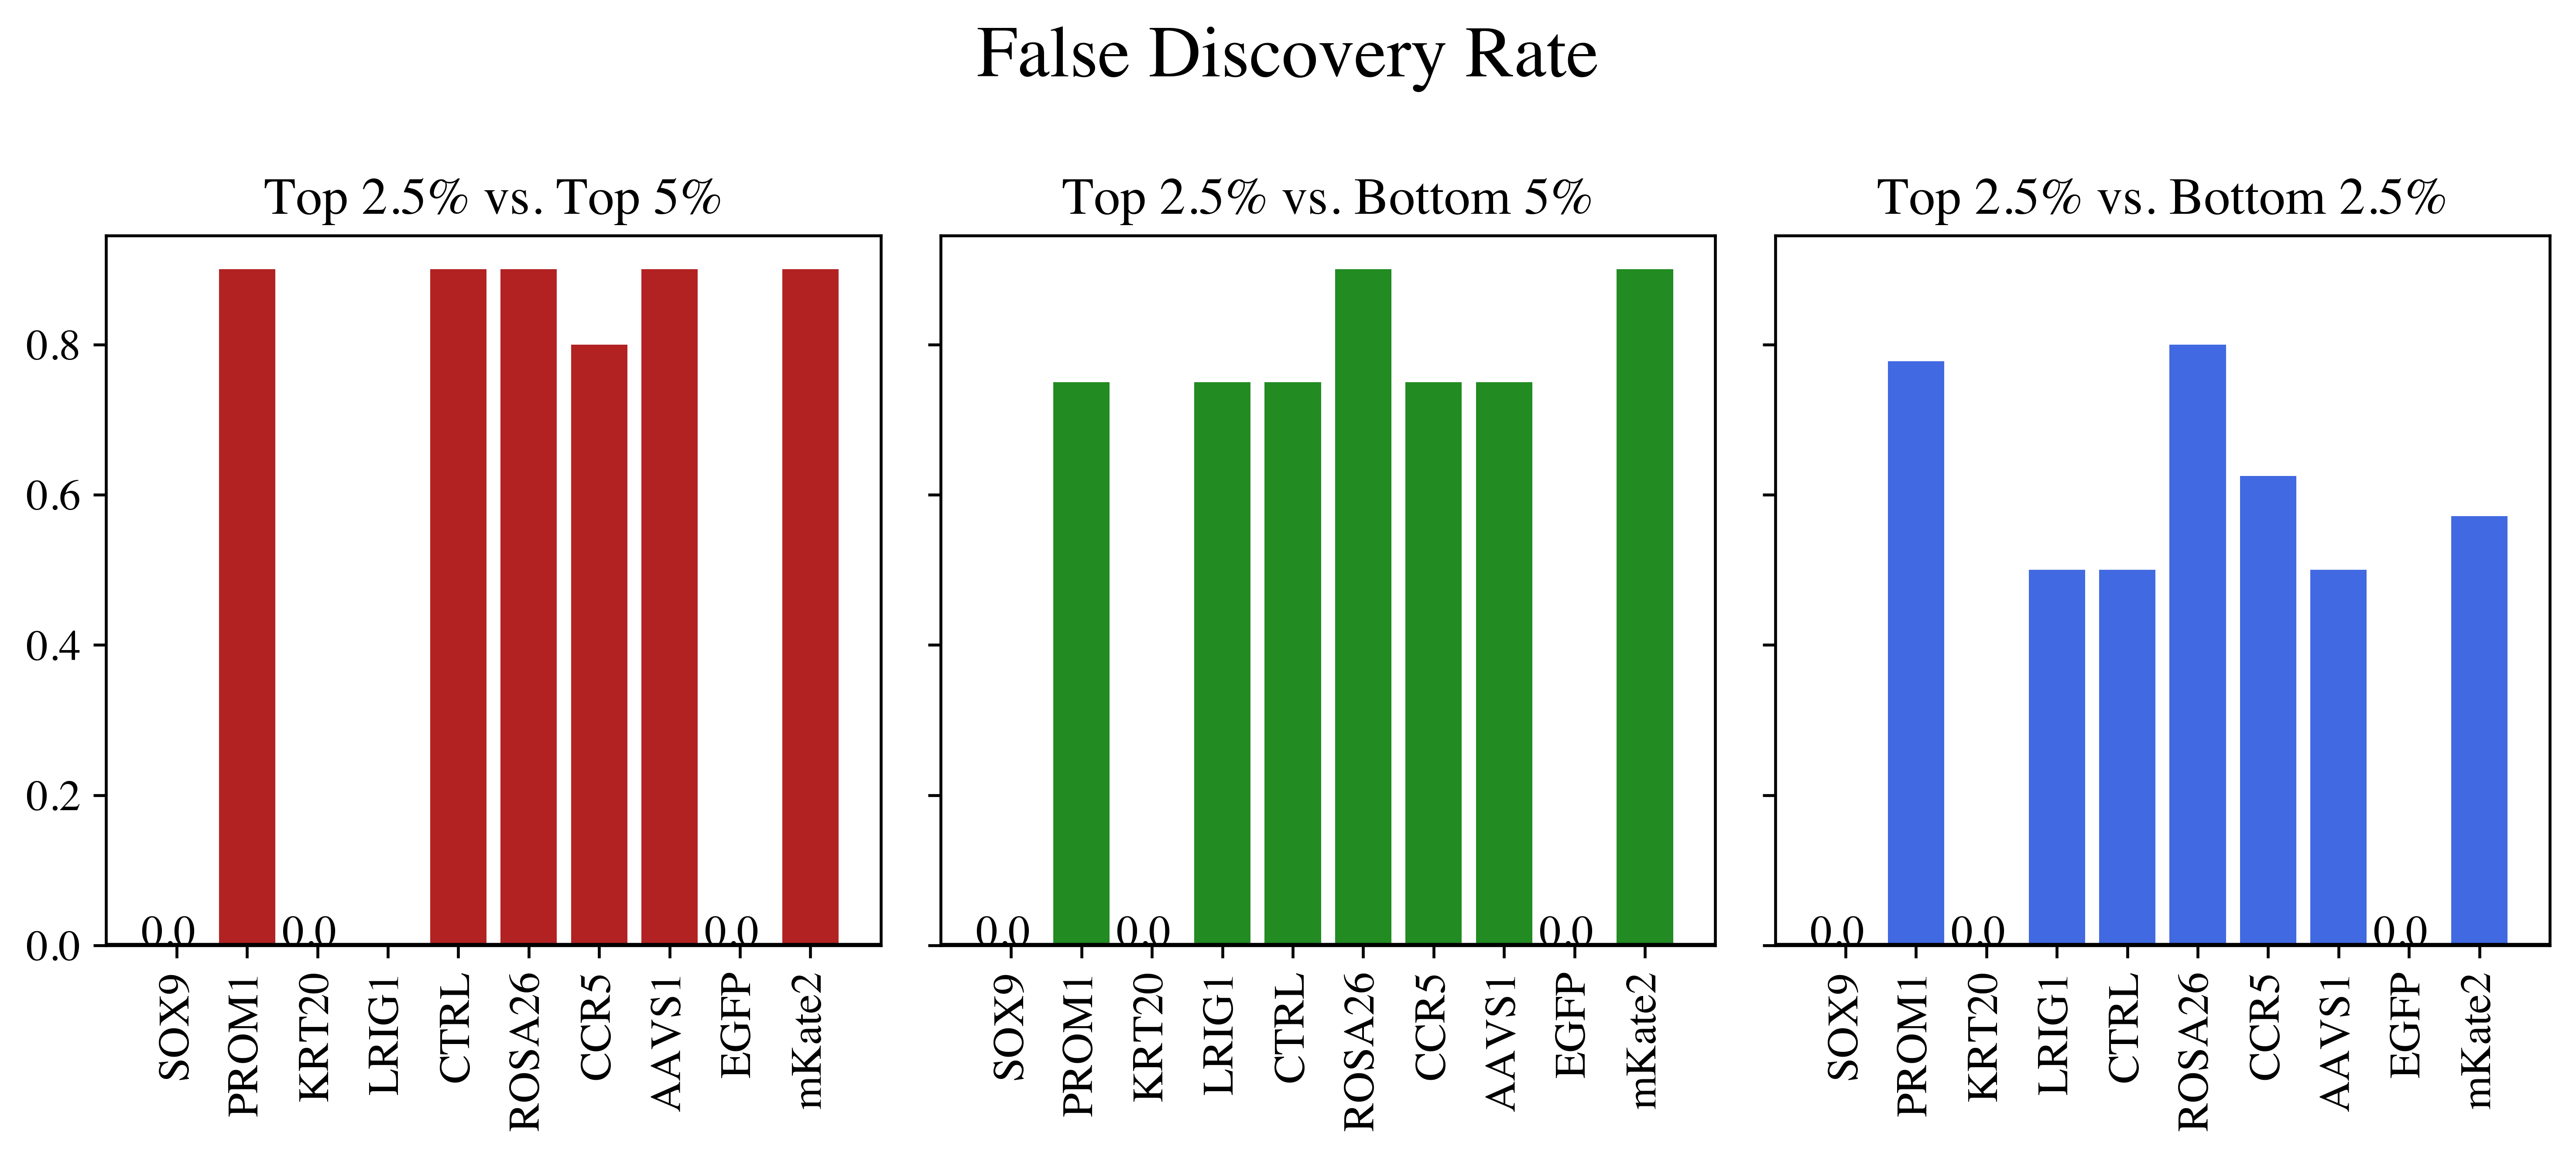

In [111]:
score(df = pd.read_csv('MLE/P4_D7.gene_summary.txt',sep='\t'),
           day = 7,
           primer = 4,
           score = "fdr",
           title = "False Discovery Rate")

# Wald P Value

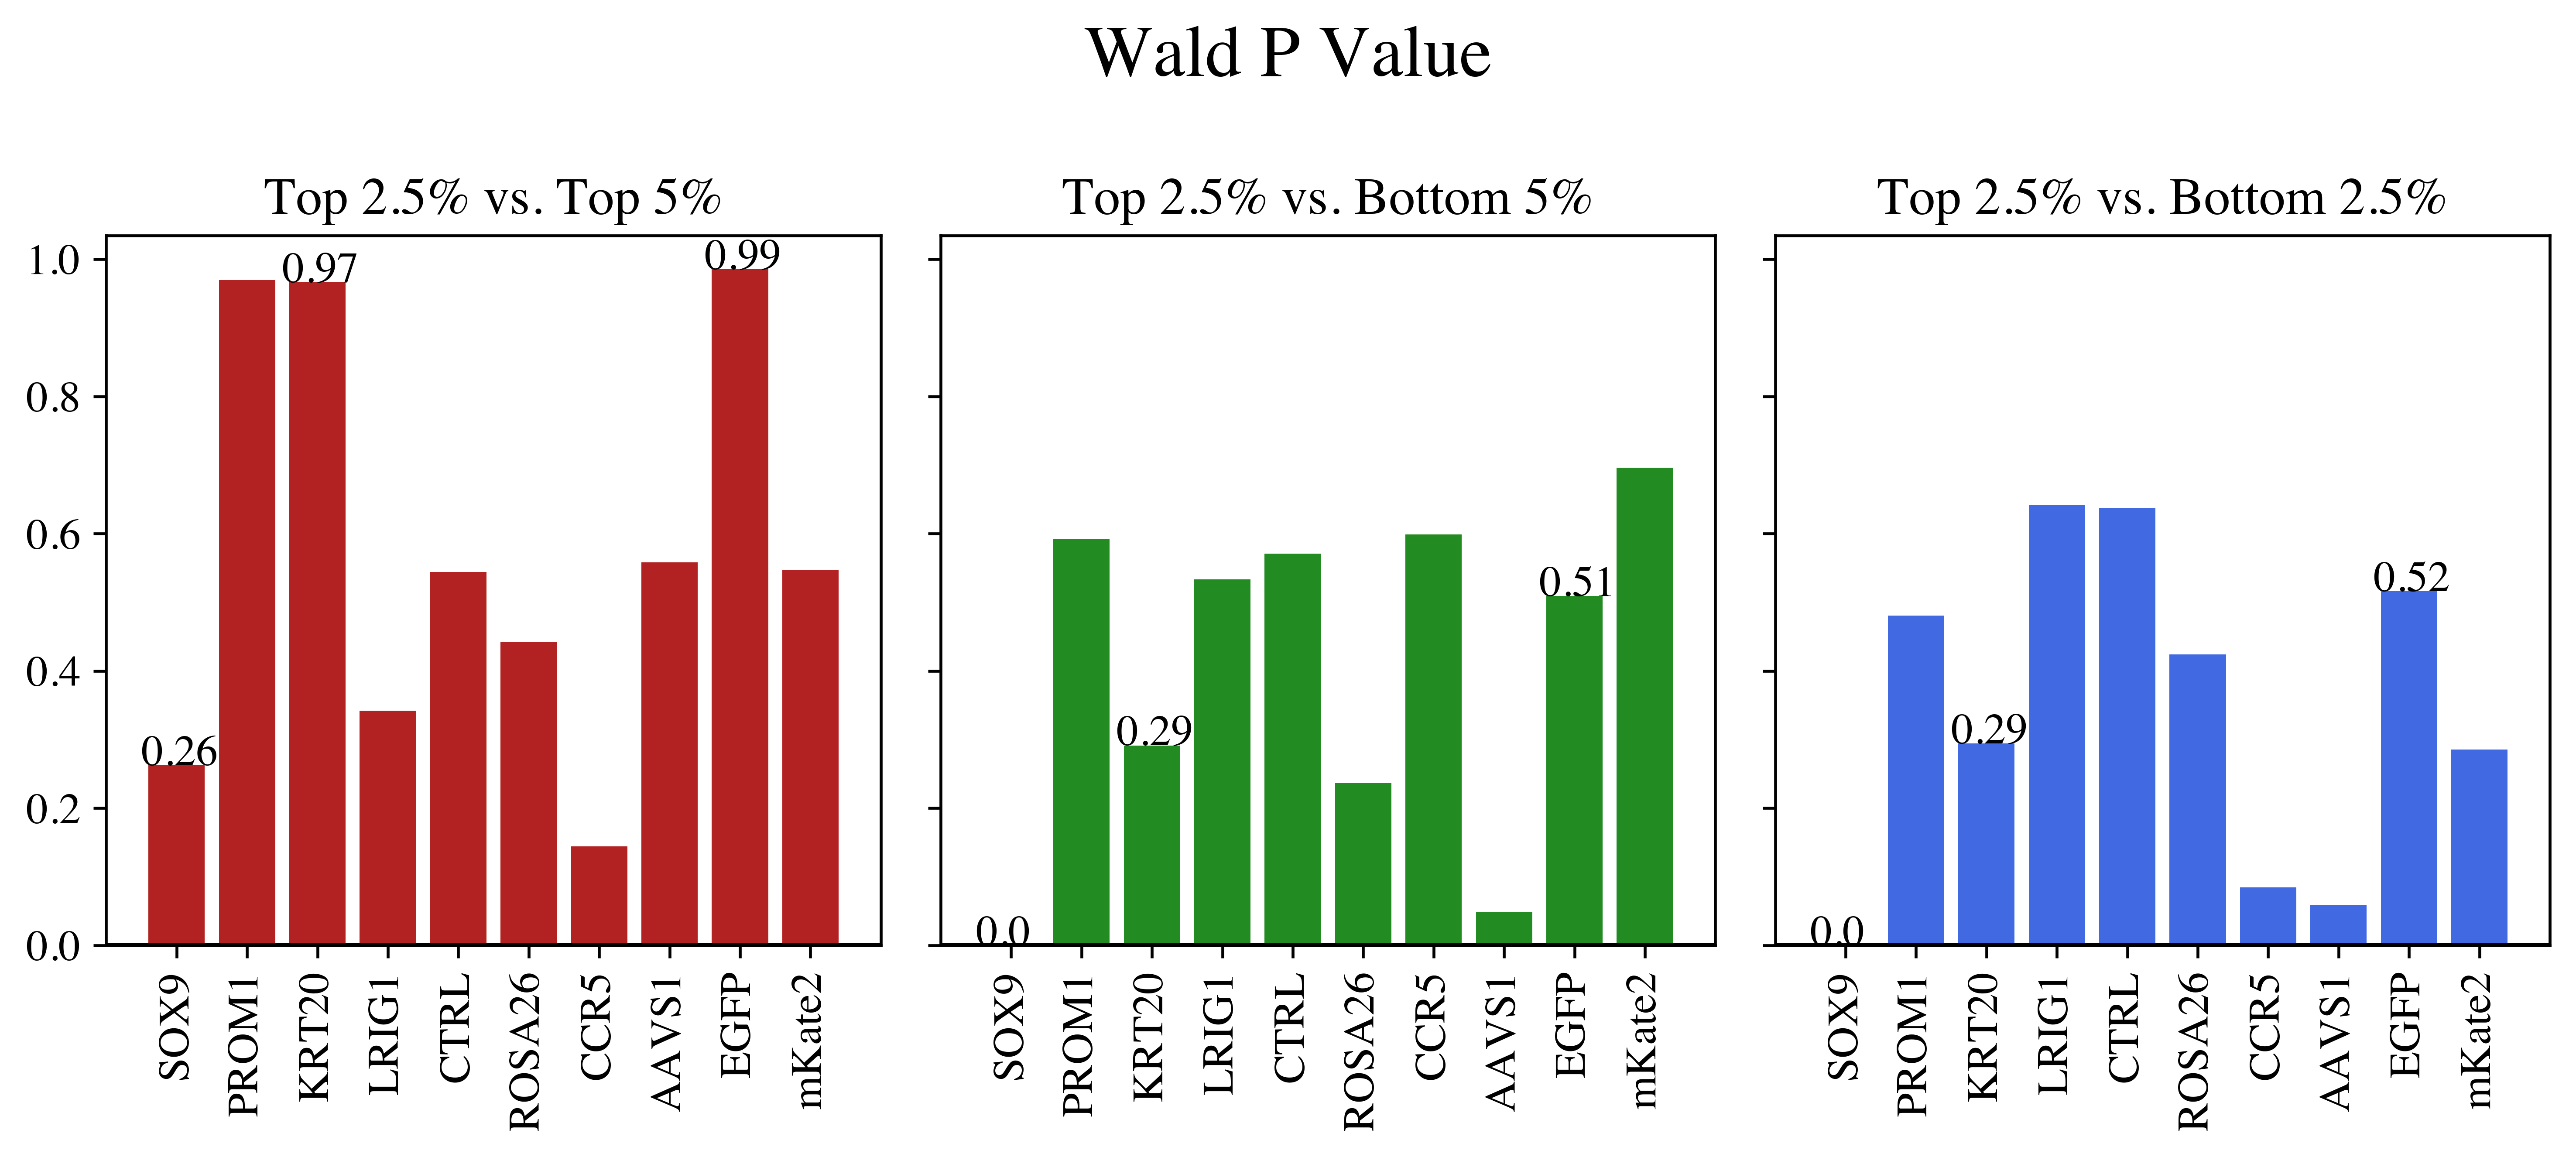

In [112]:
score(df = pd.read_csv('MLE/P4_D3.gene_summary.txt',sep='\t'),
           day = 3,
           primer = 4,
           score = "wald-p-value",
           title = "Wald P Value")

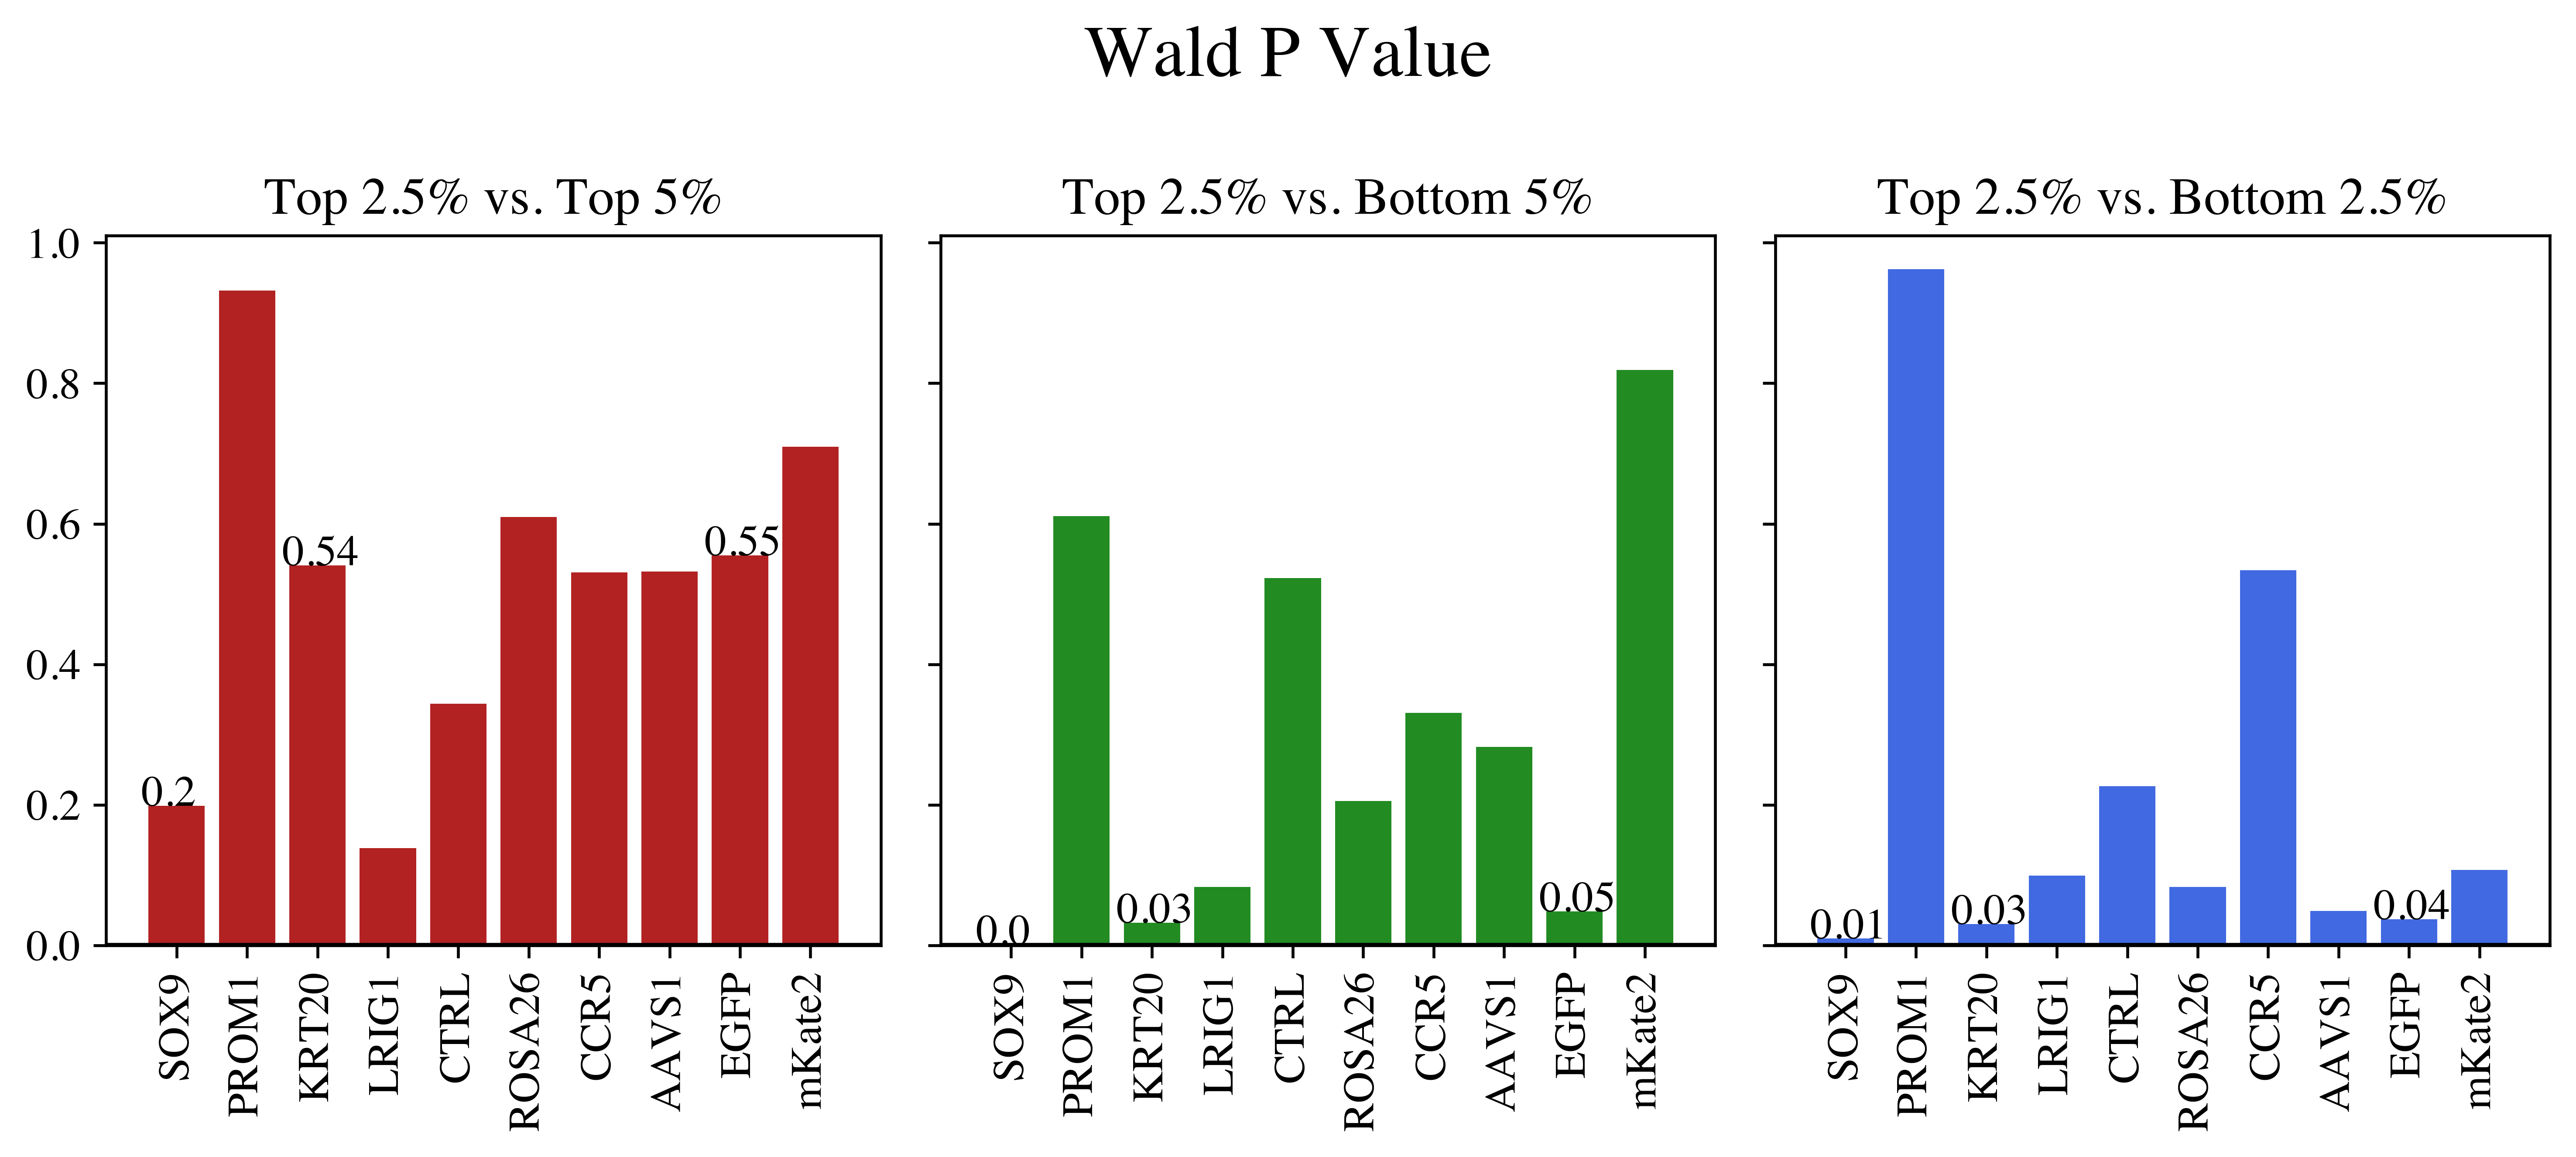

In [113]:
score(df = pd.read_csv('MLE/P4_D7.gene_summary.txt',sep='\t'),
           day = 7,
           primer = 4,
           score = "wald-p-value",
           title = "Wald P Value")

# Wald False Discovery Rate

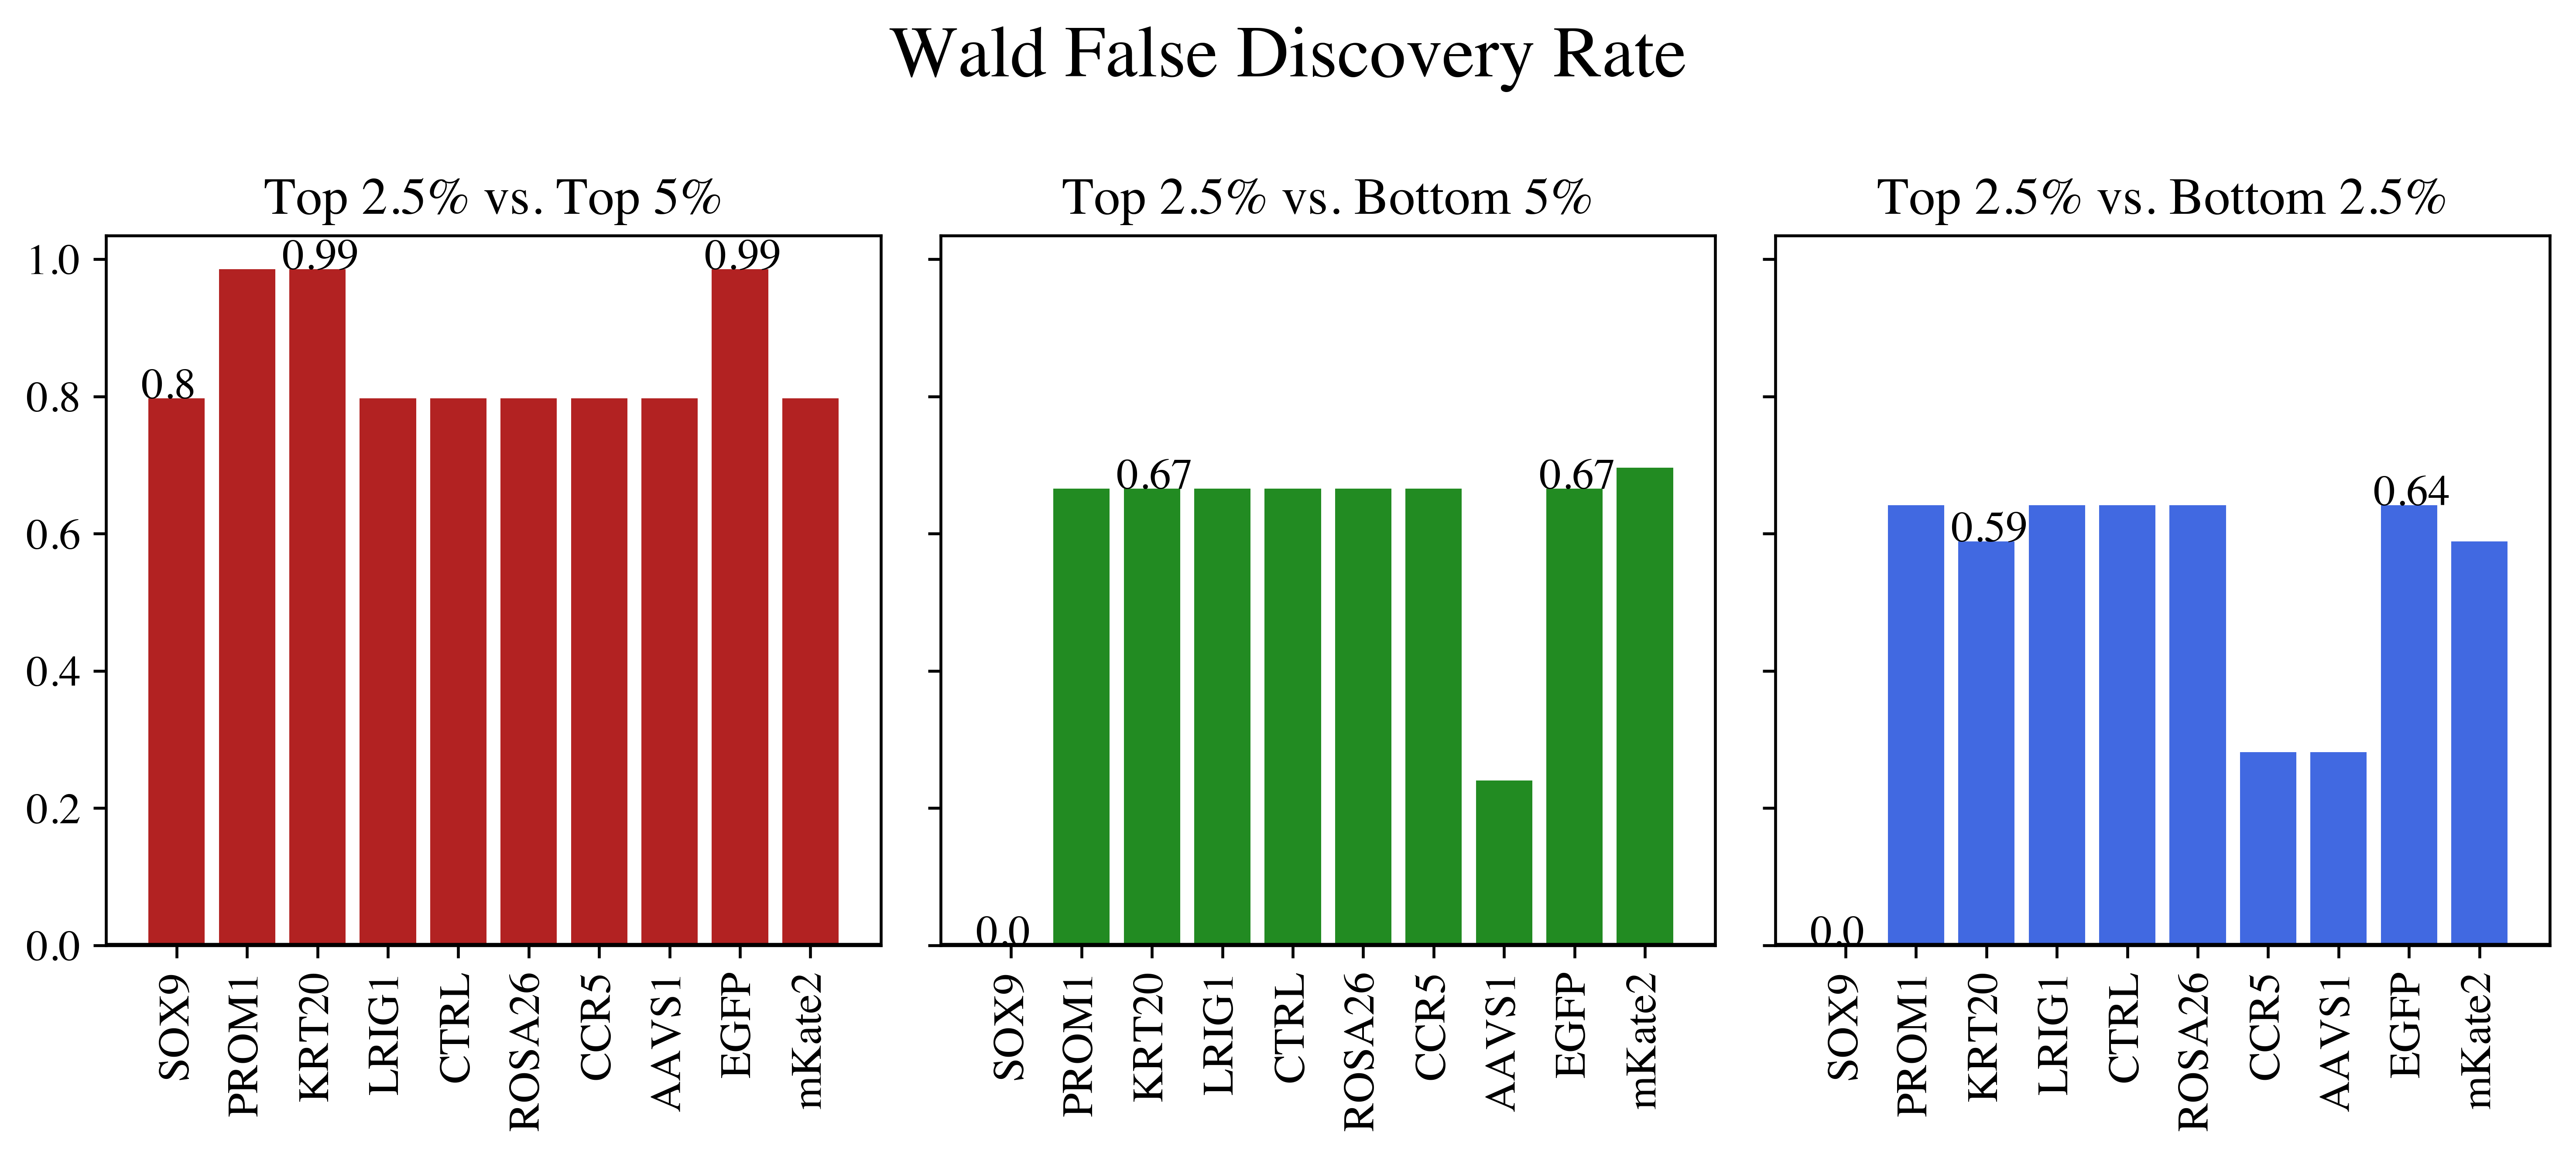

In [114]:
score(df = pd.read_csv('MLE/P4_D3.gene_summary.txt',sep='\t'),
           day = 3,
           primer = 4,
           score = "wald-fdr",
           title = "Wald False Discovery Rate")

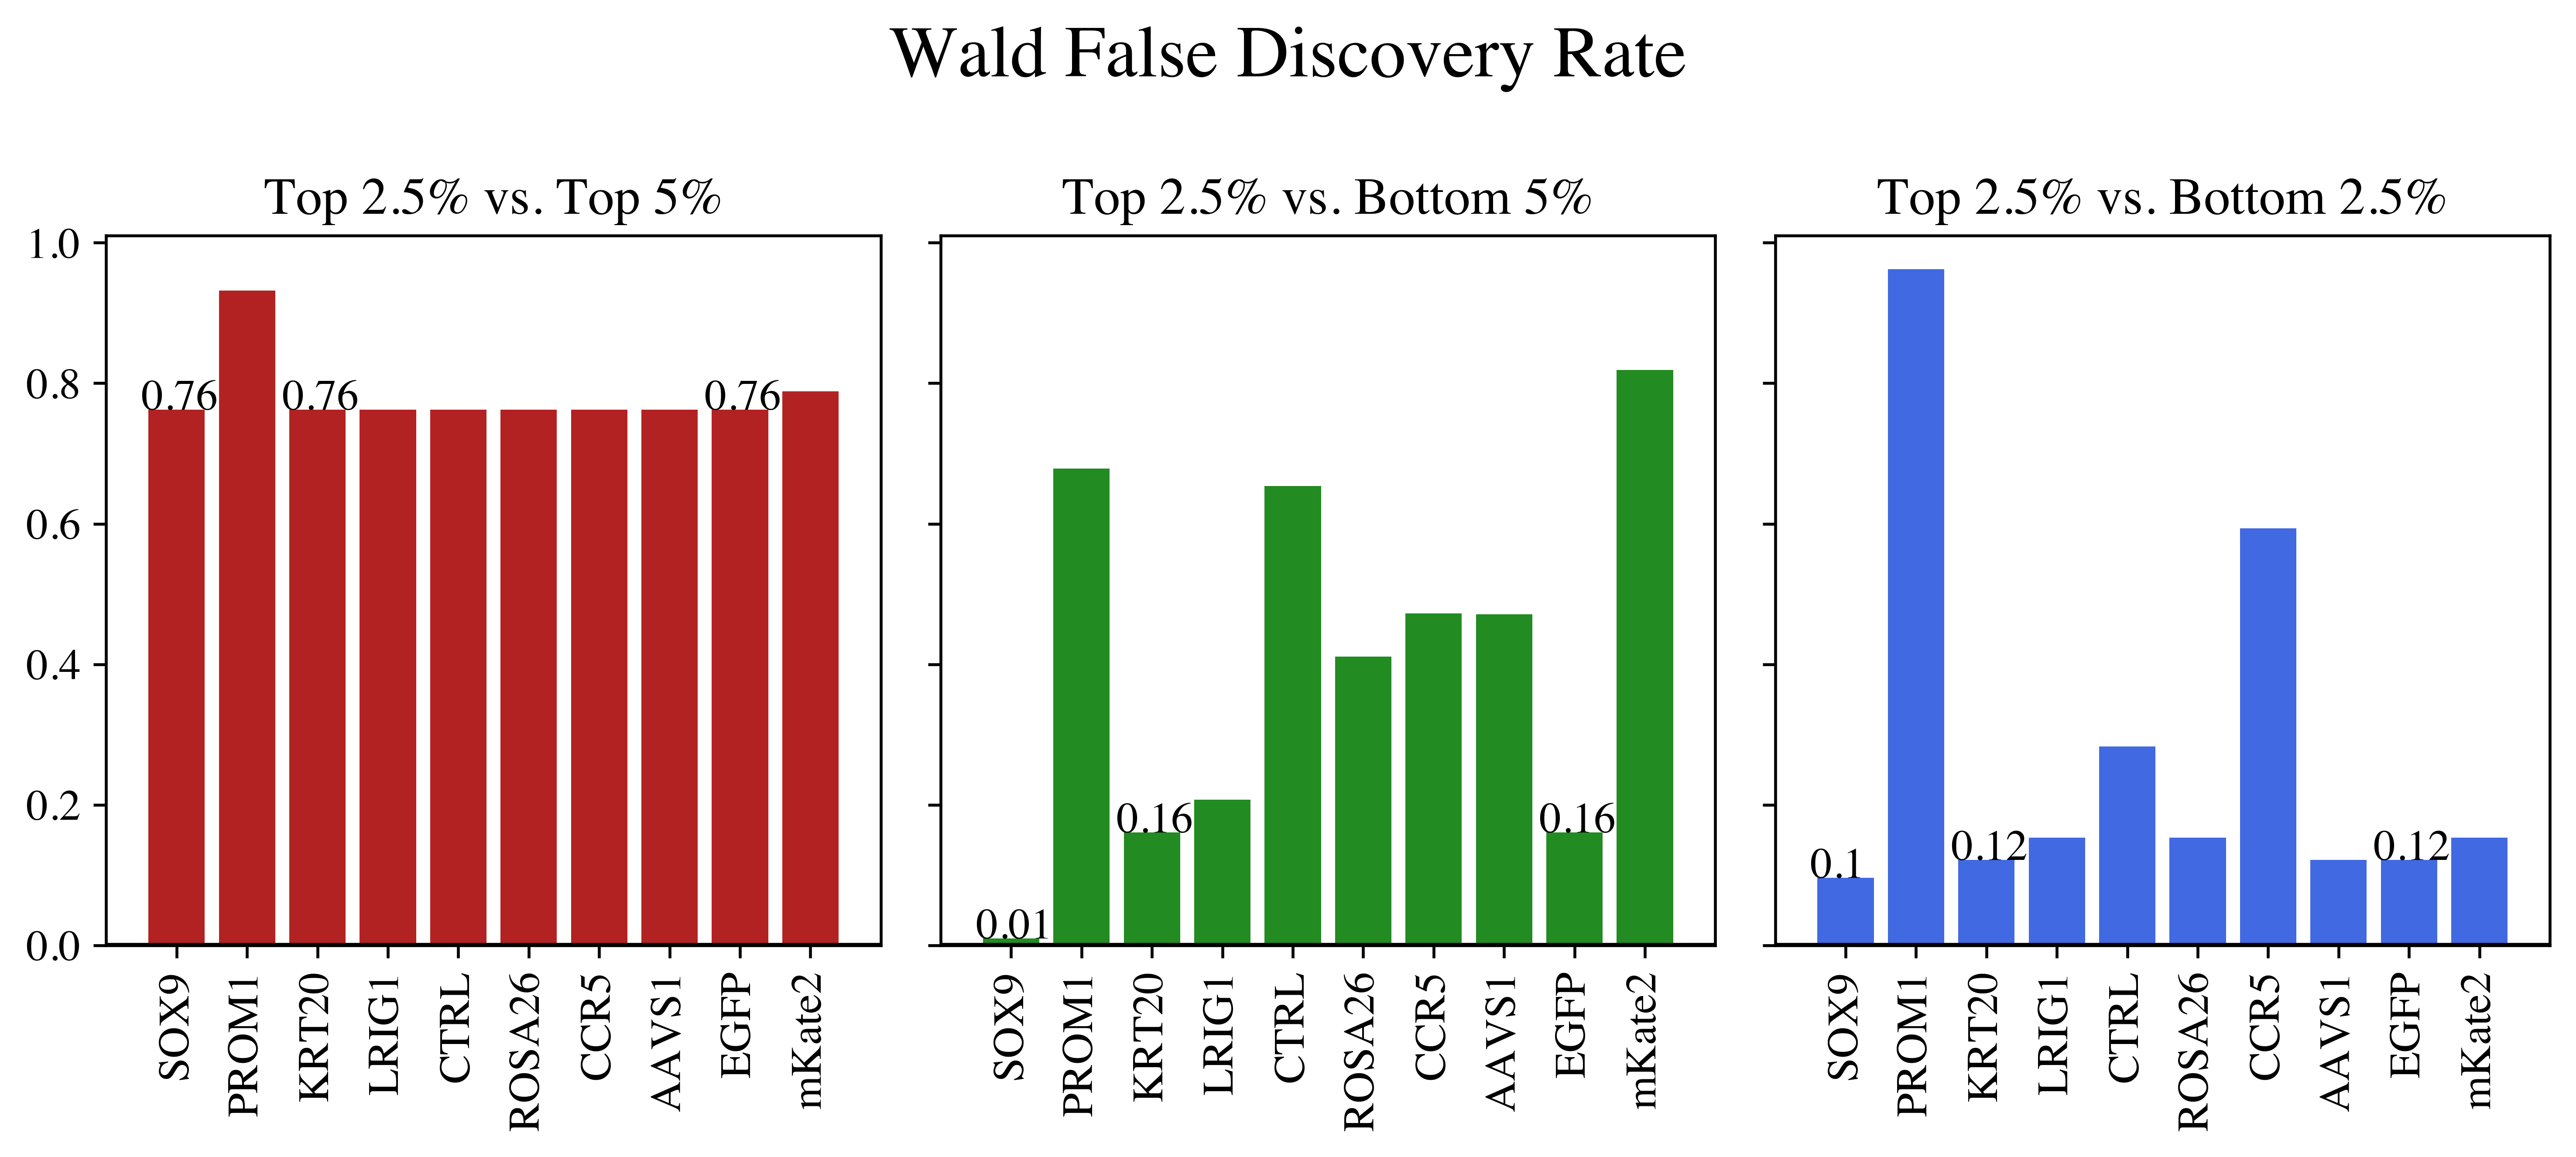

In [115]:
score(df = pd.read_csv('MLE/P4_D7.gene_summary.txt',sep='\t'),
           day = 7,
           primer = 4,
           score = "wald-fdr",
           title = "Wald False Discovery Rate")